<img src='Auto.jpg'>

# Прогнозирование стоимости автомобиля по характеристикам

* Работу выполнил  Кашеваров Василий
* студент потока 63-DST-49

* **Цель проекта** - прогнозирование стоимости автомобилей.
* **Задачи**: собрать данные об автомобилях, провести анализ, создать новые признаки, спрогнозировать стоимости для существующего тестового набора данных с помощью собранных данных  и различных моделей машинного обучения  и их комбинаций

## <a id="0"></a> Содержание:
0. [Содержание](#0)
1. [Сбор данных, импорт библиотек, описание функций](#1)
2. [Предварительный анализ данных](#2)
3. [EDA](#3)
    - [Первичное рассмотрение признаков](#3.1)
    - [Обработка количественных признаков](#3.2)
    - [Обработка категориальных признаков](#3.3)
    - [Обработка бинарных признаков](#3.4)
    - [Обработка порядковых признаков](#3.5)
    - [Обработка выбросов](#3.6)
    - [Рассмотрение признаков на предмет нормализации](#3.7)
    - [Изучение влияния признаков на целевой](#3.8)
    - [Копия датафрейма для экспериментов](#3.9)
    
4. [Обучение различных моделей](#4)
    - [Baseline - LinearRegression](#4.1)
    - [Модель CatBoost](#4.2)
    - [Подбор параметров других моделей](#4.3)
    - [Стэкинг определённых ранее моделей](#4.4)
    - [Использование других признаков](#4.5)
    - [Модель на данных без выбросов](#4.6)
    - [Итоговая модель](#4.7)

5. [Sample Submission](#5)
6. [Замечания к работе](#6)


<a id="1"></a>
# Сбор данных, импорт библиотек, описание функций

## Сбор данных

Данные об автомобилях собираются долго, поэтому код запроса закомментирован

In [15]:
# import requests
import numpy as np
import pandas as pd

In [16]:
from bs4 import BeautifulSoup

In [17]:
#import time

In [18]:
from pandas_profiling import ProfileReport

In [19]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mape

In [20]:
# создаём список, в котором будут храниться ссылки на страницы с автомобилями
# pages_list =[]
# START_URL='https://auto.ru/moskva/cars/used/'
# response = requests.get(START_URL)

# заполнение списка с ссылками на автомобили
# while len(pages_list)<5000: 
#     for i in range(1,99):   
#         response = requests.get( START_URL+'?page=%s'%i)
#         # Теперь создадим объект BeautifulSoup, указывая html парсер 
#         page = BeautifulSoup(response.text, 'html.parser')
#         for link in page.findAll('a',{"class": "Link OfferThumb"}):
#             try:
#                 if link['href'] not in pages_list: 
#                     pages_list.append(link['href'])
#             except:
#                 pass
#     print(len(pages_list))   
# time.sleep(10)

# создание списка словарей с информацией об автомобилях
# cars_list = []
# заполнение данного списка
# for item in pages_list:
#     response = requests.get(item)
#     response.encoding = 'utf8'
#     page = BeautifulSoup(response.text, 'html.parser')
#     # если автомобиль не продан
#     if page.find('div', class_='CardSold') == None:
#         try:
#             json_data = json.loads(
#                 page.find('script', type="application/ld+json").string)
#         except:
#             print(item)
#             pass
#         cls_str = 'CardInfoRow_'
#         span_str = 'CardInfoRow__cell'
#         try:
#             cars_list.append({
#             'bodyType': json_data['bodyType'],
#             'brand': json_data['brand'],
#             'car_url': json_data['offers']['url'],
#             'color': json_data['color'],
#             'description': json_data['description'],
#             'engineDisplacement': json_data['vehicleEngine']['engineDisplacement'],
#             'enginePower': json_data['vehicleEngine']['enginePower'],
#             'fuelType': json_data['fuelType'],
#             'image': json_data['image'],
#             'mileage': page.find(
#                 'li', class_=cls_str+'kmAge').find_all('span')[1].text,
#             'modelDate': json_data['modelDate'],
#             'model_name': json_data['name'],
#             'name': json_data['vehicleEngine']['name'],
#             'numberOfDoors': json_data['numberOfDoors'],
#             'parsing_unixtime': int(time.time()),
#             'priceCurrency': json_data['offers']['priceCurrency'],
#             'productionDate': json_data['productionDate'],
#             'sell_id': page.find(
#                 'div', title='Идентификатор объявления').text,
#             'vehicleConfiguration': json_data['vehicleConfiguration'],
#             'vehicleTransmission': json_data['vehicleTransmission'],
#             'Владельцы': page.find(
#                 'li', class_=cls_str+'ownersCount').find_all('span')[1].text,
#             'ПТС': page.find(
#                 'li', class_=cls_str+'pts').find_all('span')[1].text,
#             'Привод': page.find(
#                 'li', class_=cls_str+'drive').find_all('span')[1].text,
#             'Руль': page.find(
#                 'li', class_=cls_str+'wheel').find_all('span')[1].text,
#             'Состояние ': page.find(
#                 'li', class_=cls_str+'state').find_all('span')[1].text,
#             'Таможня': page.find(
#                 'li', class_=cls_str+'customs').find_all('span')[1].text,
#             'price': page.find(
#                 'span', class_='OfferPriceCaption__price').text
#             })
#         except:
#             print(item)
#             pass

   # else cars_list = []

    #print('Ожидаю 0.1 секунды...')
# time.sleep(0.1)

# создание датафрейма из списка
# df = pd.DataFrame(cars_list)
# сохраняем в csv:
# df.to_csv('cars.csv')

## Импорт библиотек и описание функций

In [21]:
#pip install lightgbm

In [22]:
#pip install xgboost

In [23]:
import sys
import re
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder


In [24]:
import matplotlib.pyplot as plt

In [25]:
import seaborn as sns

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
from sklearn.ensemble import BaggingRegressor

In [29]:
from sklearn.ensemble import AdaBoostRegressor

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
from lightgbm import LGBMRegressor

In [33]:
from xgboost import XGBRegressor

In [34]:
from sklearn.ensemble import StackingRegressor

In [35]:
import sklearn.metrics

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [39]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [40]:
# lambda функция для преобразования строк в int
to_digit = lambda x: int(re.sub('\D', '', x) if type(x)!= int else x)

In [41]:
# Функция для перевода в 1 и 0
def to_binary(x):
    if x == param:
        return 1
    else:
        return 0

In [42]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

<a id="2"></a>
# Предварительный анализ

### Исследование тестовых данных

In [43]:
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [44]:
test.head()

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,...,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня
0,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,синий,NaN,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,"{""engine-proof"":true,""tinted-glass"":true,""airb...",бензин,...,LIFTBACK ROBOT 1.2,роботизированная,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
1,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,чёрный,NaN,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,...,LIFTBACK MECHANICAL 1.6,механическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
2,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/superb/11...,серый,"{""id"":""20026336"",""name"":""Ambition"",""available_...","Все автомобили, представленные в продаже, прох...",1.8 LTR,152 N12,"{""cruise-control"":true,""tinted-glass"":true,""es...",бензин,...,LIFTBACK ROBOT 1.8,роботизированная,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
3,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,коричневый,"{""id"":""20803582"",""name"":""Ambition"",""available_...",КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,1.6 LTR,110 N12,"{""cruise-control"":true,""roller-blind-for-rear-...",бензин,...,LIFTBACK AUTOMATIC 1.6,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
4,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,белый,NaN,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,1.8 LTR,152 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,...,LIFTBACK AUTOMATIC 1.8,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

In [46]:
# profile = ProfileReport(test, title = 'Pandas Profiling Report')

In [47]:
# profile

In [48]:
np.sum(test.isna())

bodyType                    0
brand                       0
car_url                     0
color                       0
complectation_dict      28268
description                 0
engineDisplacement          0
enginePower                 0
equipment_dict           9996
fuelType                    0
image                       0
mileage                     0
modelDate                   0
model_info                  0
model_name                  0
name                        0
numberOfDoors               0
parsing_unixtime            0
priceCurrency               0
productionDate              0
sell_id                     0
super_gen                   0
vehicleConfiguration        0
vehicleTransmission         0
vendor                      0
Владельцы                   0
Владение                22691
ПТС                         1
Привод                      0
Руль                        0
Состояние                   0
Таможня                     0
dtype: int64

### Исследование тренировочных данных

In [49]:
train = pd.read_csv('cars_df.csv')

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [50]:
train.sample(20)

,bodyType,brand,car_url,color,description,engineDisplacement,enginePower,fuelType,image,mileage,...,productionDate,vehicleConfiguration,vehicleTransmission,Владельцы,ПТС,Привод,Руль,Состояние,Таможня,price
12901,внедорожник 5 дв.,NISSAN,https://auto.ru/cars/used/sale/nissan/murano/1...,серый,Комплект летних шин в подарок.,3.5 LTR,231 N12,бензин,https://autoru.naydex.net/ljqD86H23/16705aqI2/...,215000,...,2006,ALLROAD_5_DOORS VARIATOR 3.5,вариатор,3 или более,Оригинал,полный,Левый,Не требует ремонта,Растаможен,470000
937,внедорожник 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/x6/11036904...,серый,"Авто в идеальном состоянии, крашеных деталей н...",3.0 LTR,306 N12,дизель,https://avatars.mds.yandex.net/get-autoru-vos/...,144 000 км,...,2010,ALLROAD_5_DOORS AUTOMATIC 3.0,автоматическая,3 или более,Дубликат,полный,Левый,Не требует ремонта,Растаможен,1 740 000 ₽
26928,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,чёрный,Продажа от официального дилера ГК «АВТОМИР».\n...,1.6 LTR,110 N12,бензин,https://autoru.naydex.net/9BLat2w73/5235e3feo_...,7568,...,2019,LIFTBACK MECHANICAL 1.6,механическая,2 владельца,Оригинал,передний,Левый,Не требует ремонта,Растаможен,1262000
6404,седан,VOLKSWAGEN,https://auto.ru/cars/used/sale/volkswagen/polo...,белый,А/М покупался у официального дилера; Один влад...,1.6 LTR,105 N12,бензин,https://autoru.naydex.net/s1Es6A975/ab8c8ahfBe...,239524,...,2011,SEDAN AUTOMATIC 1.6,автоматическая,1 владелец,Оригинал,передний,Левый,Не требует ремонта,Растаможен,399000
1707,внедорожник 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/x3/11037279...,синий,АВТОПОРТ - ОФИЦИАЛЬНЫЙ ДИЛЕР BMW И MINI.\n\nГА...,3.0 LTR,249 N12,дизель,https://avatars.mds.yandex.net/get-autoru-vos/...,29 469 км,...,2018,ALLROAD_5_DOORS AUTOMATIC 3.0,автоматическая,1 владелец,Оригинал,полный,Левый,Не требует ремонта,Растаможен,4 217 000 ₽
25594,внедорожник 5 дв.,MITSUBISHI,https://auto.ru/cars/used/sale/mitsubishi/paje...,чёрный,Мультимедиа: 6. Салон: 2. Обзор: 1. Элементы э...,2.5 LTR,178 N12,дизель,https://avatars.mds.yandex.net/get-autoru-vos/...,208000,...,2012,ALLROAD_5_DOORS MECHANICAL 2.5,механическая,1 владелец,Оригинал,полный,Левый,Не требует ремонта,Растаможен,960000
29005,внедорожник 5 дв.,AUDI,https://auto.ru/cars/used/sale/audi/q7/1103231...,белый,Ваш выбор и Ваше время — наши главные приорите...,3.0 LTR,249 N12,дизель,https://autoru.naydex.net/ljqD86H23/16705aqI2/...,52975,...,2017,ALLROAD_5_DOORS AUTOMATIC 3.0,автоматическая,2 владельца,Оригинал,полный,Левый,Не требует ремонта,Растаможен,4500000
29602,седан,AUDI,https://auto.ru/cars/used/sale/audi/a8/1101807...,чёрный,"Сколы на бампере от камушков, ДИЗЕЛЬ! Сервисна...",3.0 LTR,250 N12,дизель,https://avatars.mds.yandex.net/get-autoru-vos/...,147000,...,2015,SEDAN AUTOMATIC 3.0,автоматическая,3 или более,Дубликат,полный,Левый,Не требует ремонта,Растаможен,2249000
2404,хэтчбек 5 дв.,DAEWOO,https://auto.ru/cars/used/sale/daewoo/matiz/11...,синий,Автомобиль в отличном состоянии.\nАвтомобиль н...,0.8 LTR,52 N12,бензин,https://autoru.naydex.net/dVb17C804/f1af98yqCU...,93 250 км,...,2010,HATCHBACK_5_DOORS MECHANICAL 0.8,механическая,2 владельца,Оригинал,передний,Левый,Не требует ремонта,Растаможен,155 000 ₽
4598,седан,VOLKSWAGEN,https://auto.ru/cars/used/sale/volkswagen/pass...,коричневый,В нашем автосалоне Вы можете автомобиль - купи...,1.8 LTR,152 N12,бензин,https://autoru.naydex.net/pWyHl9270/570900JZE/...,117 630 км,...,2014,SEDAN ROBOT 1.8,роботизированная,2 владельца,Оригинал,передний,Левый,Не требует ремонта,Растаможен,899 000 ₽


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33531 entries, 0 to 33530
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              33531 non-null  object
 1   brand                 33531 non-null  object
 2   car_url               33531 non-null  object
 3   color                 33531 non-null  object
 4   description           33531 non-null  object
 5   engineDisplacement    33531 non-null  object
 6   enginePower           33531 non-null  object
 7   fuelType              33531 non-null  object
 8   image                 33531 non-null  object
 9   mileage               33531 non-null  object
 10  modelDate             33531 non-null  int64 
 11  model_name            33531 non-null  object
 12  name                  33531 non-null  object
 13  numberOfDoors         33531 non-null  int64 
 14  priceCurrency         33531 non-null  object
 15  productionDate        33531 non-null

In [52]:
# profile = ProfileReport(train, title = 'Pandas Profiling Report')

In [53]:
# profile

Рассмотрим, какие столбцы есть в test, но отсутствуют в train:

In [54]:
dif_list = list(set(test.columns).difference(train.columns))
dif_list

['super_gen',
 'equipment_dict',
 'parsing_unixtime',
 'sell_id',
 'model_info',
 'vendor',
 'Владение',
 'complectation_dict']

Поскольку этих колонок нет в обучающих данных, не будем их рассматривать.

Также посмотрим, как отличаются типы данных в одноимённых колонках train и test.

In [55]:
# Создадим список с колонками, которые присутствуют и в train, и в test
cols_intersection = list(set(test.columns).intersection(train.columns))

In [56]:
# Проверим, в каких колонках типы данных различаются у train и test
cols_type_dif = []  # создаем список с колонками, в которых типы данных отличаются
print("Найдены расхождения в типах данных для:")

for col in cols_intersection:
    if type(test[col][0]) != type(train[col][0]):
        print(
            f"\t- колонки {col}: для train - {type(train[col][0])}, для test - {type(test[col][0])}")
        cols_type_dif.append(col)

Найдены расхождения в типах данных для:
	- колонки mileage: для train - <class 'str'>, для test - <class 'numpy.int64'>


In [57]:
train.mileage.unique()

array(['240\xa0000\xa0км', '53\xa0800\xa0км', '40\xa0100\xa0км', ...,
       315164, 373317, 196000], dtype=object)

Данные в mileage различных типов: str и int. Применим функцию to_digit для перевода в int.

In [58]:
train['mileage'] = train.mileage.apply(to_digit) 

Брэндов гораздо больше, чем в тесте. Можно отобрать те же, что в тесте, но это будет подгонкой под тестовые данные. 

В будущем попробуем и увидим, как это повлияет на модель.

In [59]:
train.brand.unique()

array(['MERCEDES', 'CHEVROLET', 'LAMBORGHINI', 'BMW', 'MCLAREN', 'LEXUS',
       'DODGE', 'PORSCHE', 'AUDI', 'KIA', 'TOYOTA', 'FORD', 'HYUNDAI',
       'CITROEN', 'NISSAN', 'GAZ', 'VAZ', 'CHRYSLER', 'MITSUBISHI',
       'INFINITI', 'VOLKSWAGEN', 'VOLVO', 'PEUGEOT', 'GENESIS', 'BENTLEY',
       'ROLLS_ROYCE', 'CADILLAC', 'SUZUKI', 'MINI', 'LAND_ROVER', 'FIAT',
       'SKODA', 'GEELY', 'RENAULT', 'MAZDA', 'HONDA', 'FERRARI', 'OPEL',
       'TESLA', 'MASERATI', 'JEEP', 'CHERY', 'SSANG_YONG', 'UAZ',
       'DAIHATSU', 'HAVAL', 'JAGUAR', 'GREAT_WALL', 'DAEWOO', 'LIFAN',
       'IRAN_KHODRO', 'SUBARU', 'HUMMER', 'ALFA_ROMEO', 'SEAT', 'ACURA',
       'VORTEX', 'SMART', 'GAC', 'DATSUN', 'ZAZ', 'LUXGEN', 'SAAB',
       'ZOTYE', 'DW_HOWER', 'RAM', 'MOSCVICH', 'MG', 'TATRA', 'SATURN'],
      dtype=object)

In [60]:
test.brand.unique()

array(['SKODA', 'AUDI', 'HONDA', 'VOLVO', 'BMW', 'NISSAN', 'INFINITI',
       'MERCEDES', 'TOYOTA', 'LEXUS', 'VOLKSWAGEN', 'MITSUBISHI'],
      dtype=object)

Значения nan в test присутствуют в тех признаках, которых нет в train, поэтому не стоит их как-то обрабатывать.

In [61]:
np.sum(test.isna())

bodyType                    0
brand                       0
car_url                     0
color                       0
complectation_dict      28268
description                 0
engineDisplacement          0
enginePower                 0
equipment_dict           9996
fuelType                    0
image                       0
mileage                     0
modelDate                   0
model_info                  0
model_name                  0
name                        0
numberOfDoors               0
parsing_unixtime            0
priceCurrency               0
productionDate              0
sell_id                     0
super_gen                   0
vehicleConfiguration        0
vehicleTransmission         0
vendor                      0
Владельцы                   0
Владение                22691
ПТС                         1
Привод                      0
Руль                        0
Состояние                   0
Таможня                     0
dtype: int64

В train nan отсутствуют

In [62]:
np.sum(train.isna())

bodyType                0
brand                   0
car_url                 0
color                   0
description             0
engineDisplacement      0
enginePower             0
fuelType                0
image                   0
mileage                 0
modelDate               0
model_name              0
name                    0
numberOfDoors           0
priceCurrency           0
productionDate          0
vehicleConfiguration    0
vehicleTransmission     0
Владельцы               0
ПТС                     0
Привод                  0
Руль                    0
Состояние               0
Таможня                 0
price                   0
dtype: int64

<a id="3"></a>
# EDA

Объединим всё в один датасет и начнём работу с данными.

Удаляем столбцы, которых нет в train (в тч complectation_dict, equipment_dict и Владение, в которых есть пропуски).

In [63]:
test.drop(['vendor', 'Владение', 'model_info', 'equipment_dict',
 'complectation_dict', 'super_gen', 'parsing_unixtime', 'sell_id'], axis=1 , inplace=True)

In [64]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
train['sample'] = 1 # помечаем где у нас трейн
test['sample'] = 0 # помечаем где у нас тест
test['price'] = 0 # в тесте у нас нет значения price, мы его должны предсказать, по этому пока просто заполняем нулями

cars = test.append(train, sort=False).reset_index(drop=True) # объединяем

In [65]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68217 entries, 0 to 68216
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              68217 non-null  object
 1   brand                 68217 non-null  object
 2   car_url               68217 non-null  object
 3   color                 68217 non-null  object
 4   description           68217 non-null  object
 5   engineDisplacement    68217 non-null  object
 6   enginePower           68217 non-null  object
 7   fuelType              68217 non-null  object
 8   image                 68217 non-null  object
 9   mileage               68217 non-null  int64 
 10  modelDate             68217 non-null  int64 
 11  model_name            68217 non-null  object
 12  name                  68217 non-null  object
 13  numberOfDoors         68217 non-null  int64 
 14  priceCurrency         68217 non-null  object
 15  productionDate        68217 non-null

Ещё раз создадим и посмотрим отчёт уже о всех признаках

In [66]:
# profile = ProfileReport(cars, title = 'Pandas Profiling Report')

In [67]:
# profile

Определимся, что делать с признаками: некоторые необходимо преобразовать, некоторые - удалить.

#### Признаки
* 0   bodyType  | тип авто |  категориальный  -  создать группы
* 1   brand     | Марка |    категориальный  - попробовать ограничить данные только марками, представленными в test
* 2   car_url     |ссылка|  доп информация  - **в обучение не брать**
* 3   color       |цвет|  категориальный   -   ?
* 4   description     |описание|  доп информация  - пока не использовать (можно поискать слова и тональность в описании)
* 5   engineDisplacement    | объём двигателя | порядковый - преобразовать в int
* 6   enginePower      | мощность двигателя | порядковый - преобразовать в int
* 7   fuelType        | тип топлива | категориальный  - ?
* 8   image            | изображение | доп информация  -  удалить?
* 9   mileage          | пробег |  количественный  -  можно сократить масштаб до нескольких категорий
* 10  modelDate  int64 | Год создания модели |  количественный  
* 11  model_name       | название модели | доп информация -  вытащить информацию о классе как доп признак
* 12  name             | объём и вид трансмиссии | категориальный - оставить только трансмиссию и по ней преобразовать в int
* 13  numberOfDoors  int64    | количество дверей | порядковый  
* 14  priceCurrency     |валюта|  доп информация - есть только рубли, поэтому **удалить**
* 15  productionDate  int64  | Год выпуска | количественный
* 16  vehicleConfiguration |общая информация о 4-х признаках, уже найденных| - **не удалить, использовать где nan**
* 17  vehicleTransmission  |Тип трансмиссии|  категориальный  -  преобразовать в int
* 18  Владельцы   | количество владельцев по ПТС| порядковый(чем больше тем хуже)  - преобразовать в int 
* 19  ПТС | Оригинал или дубликат ПТС| бинарный  -  преобразовать в int
* 20  Привод   | вид привода| категориальный  -  преобразовать в int (можно также преобразовать в бинарный, по принципу полный или нет)
* 21  Руль     | правый или левый руль| бинарный - преобразовать в int   
* 22  Состояние   |требует ли ремонта| бинарный  -  преобразовать в int
* 23  Таможня     | Растоможен или нет| бинарный  -  преобразовать в int

* 24 sample  |Трэйн или тест| бинарный  -  использовать при запросе на тестовые данные в конце
* 25  price    | Цена-целевой признак| количественный - преобразовать в int


Удалим ненужные признаки.

In [68]:
# точно можно удалить признак валюты
cars.priceCurrency.unique()

array(['RUB'], dtype=object)

Сохраним vehicleConfiguration, чтобы использовать его там, где значения 3-х признаков, которые он дублирует, равны nan 

In [69]:
# vehicleConfiguration дублирует информацию, которую дают признаки Привод, vehicleTransmission и engineDisplacement
cars.vehicleConfiguration.unique()

array(['LIFTBACK ROBOT 1.2', 'LIFTBACK MECHANICAL 1.6',
       'LIFTBACK ROBOT 1.8', 'LIFTBACK AUTOMATIC 1.6',
       'LIFTBACK AUTOMATIC 1.8', 'LIFTBACK ROBOT 2.0',
       'ALLROAD_5_DOORS ROBOT 1.8', 'ALLROAD_5_DOORS MECHANICAL 1.4',
       'ALLROAD_5_DOORS MECHANICAL 1.8', 'LIFTBACK ROBOT 1.4',
       'ALLROAD_5_DOORS ROBOT 1.4', 'ALLROAD_5_DOORS ROBOT 2.0',
       'ALLROAD_5_DOORS MECHANICAL 1.2', 'LIFTBACK MECHANICAL 1.4',
       'HATCHBACK_5_DOORS AUTOMATIC 1.6',
       'HATCHBACK_5_DOORS MECHANICAL 1.2', 'ALLROAD_5_DOORS ROBOT 1.2',
       'SEDAN AUTOMATIC 1.8', 'COMPACTVAN AUTOMATIC 1.6',
       'WAGON_5_DOORS ROBOT 2.0', 'LIFTBACK MECHANICAL 1.8',
       'ALLROAD_5_DOORS AUTOMATIC 1.6', 'HATCHBACK_5_DOORS ROBOT 1.2',
       'WAGON_5_DOORS ROBOT 1.8', 'WAGON_5_DOORS AUTOMATIC 1.6',
       'HATCHBACK_5_DOORS MECHANICAL 1.3',
       'HATCHBACK_5_DOORS MECHANICAL 1.4', 'LIFTBACK MECHANICAL 1.2',
       'COMPACTVAN MECHANICAL 1.2', 'WAGON_5_DOORS MECHANICAL 1.2',
       'HATCHBACK_

In [70]:
cars.drop(['priceCurrency'], axis=1, inplace=True)

In [71]:
cars.columns

Index(['bodyType', 'brand', 'car_url', 'color', 'description',
       'engineDisplacement', 'enginePower', 'fuelType', 'image', 'mileage',
       'modelDate', 'model_name', 'name', 'numberOfDoors', 'productionDate',
       'vehicleConfiguration', 'vehicleTransmission', 'Владельцы', 'ПТС',
       'Привод', 'Руль', 'Состояние', 'Таможня', 'sample', 'price'],
      dtype='object')

## <a id="3.1"></a>Первичное рассмотрение признаков

Итого нужно обработать 23 признака (24-й признак - sample):
    4 количественных  mileage, modelDate, productionDate, price
    7 категориальных bodyType, brand, color, fuelType, name, vehicleTransmission, Привод
    4 бинарных ПТС, Руль, Состояние, Таможня
    4 порядковых engineDisplacement, enginePower, numberOfDoors, Владельцы
    4 доп информация car_url, description, image, model_name

In [72]:
# количественные
cars[['mileage', 'modelDate', 'productionDate', 'price']]

,mileage,modelDate,productionDate,price
0,74000,2013,2014,0
1,60563,2017,2017,0
2,88000,2013,2014,0
3,95000,2013,2014,0
4,58536,2008,2012,0
...,...,...,...,...
68212,373317,1999,1999,210000
68213,311000,2002,2002,330000
68214,196000,2008,2008,430000
68215,350000,2000,2000,135000


In [73]:
# категориальные
cars[['bodyType', 'brand', 'color', 'fuelType', 'name', 'vehicleTransmission', 'Привод']].head()

,bodyType,brand,color,fuelType,name,vehicleTransmission,Привод
0,лифтбек,SKODA,синий,бензин,1.2 AMT (105 л.с.),роботизированная,передний
1,лифтбек,SKODA,чёрный,бензин,1.6 MT (110 л.с.),механическая,передний
2,лифтбек,SKODA,серый,бензин,DSG 1.8 AMT (152 л.с.),роботизированная,передний
3,лифтбек,SKODA,коричневый,бензин,1.6 AT (110 л.с.),автоматическая,передний
4,лифтбек,SKODA,белый,бензин,1.8 AT (152 л.с.),автоматическая,передний


Признак name дублирует vehicleTransmission и engineDisplacement, его можно не включать, либо использовать потом для перевода трансмиссии в число. 
Признаки vehicleTransmission и Привод могут быть переведены в порядковые.

Признак brand опредедённо нужно разбить на классы: люксовый или нет.

In [74]:
cars['Привод'].unique()

array(['передний', 'полный', 'задний'], dtype=object)

In [75]:
cars.name.unique()

array(['1.2 AMT (105 л.с.)', '1.6 MT (110 л.с.)',
       'DSG 1.8 AMT (152 л.с.)', ...,
       'Honda Stepwgn  IV Рестайлинг Spada', 'Honda Civic Ferio  II',
       'Honda Prelude  II'], dtype=object)

In [76]:
# Бинарные
cars[['ПТС', 'Руль', 'Состояние', 'Таможня']]

,ПТС,Руль,Состояние,Таможня
0,Оригинал,Левый,Не требует ремонта,Растаможен
1,Оригинал,Левый,Не требует ремонта,Растаможен
2,Оригинал,Левый,Не требует ремонта,Растаможен
3,Оригинал,Левый,Не требует ремонта,Растаможен
4,Оригинал,Левый,Не требует ремонта,Растаможен
...,...,...,...,...
68212,Дубликат,Левый,Не требует ремонта,Растаможен
68213,Оригинал,Правый,Не требует ремонта,Растаможен
68214,Дубликат,Левый,Не требует ремонта,Растаможен
68215,Дубликат,Левый,Не требует ремонта,Растаможен


In [77]:
cars['ПТС'].value_counts()

Оригинал    59649
Дубликат     8567
Name: ПТС, dtype: int64

In [78]:
cars['Руль'].value_counts()

Левый     65746
Правый     2471
Name: Руль, dtype: int64

In [79]:
cars['Состояние'].value_counts()

Не требует ремонта    68215
Битый / не на ходу        2
Name: Состояние, dtype: int64

In [80]:
cars['Таможня'].value_counts()

Растаможен    68217
Name: Таможня, dtype: int64

In [81]:
# порядковые
cars[['engineDisplacement', 'enginePower', 'numberOfDoors', 'Владельцы']].head(20)

,engineDisplacement,enginePower,numberOfDoors,Владельцы
0,1.2 LTR,105 N12,5,3 или более
1,1.6 LTR,110 N12,5,1 владелец
2,1.8 LTR,152 N12,5,1 владелец
3,1.6 LTR,110 N12,5,1 владелец
4,1.8 LTR,152 N12,5,1 владелец
5,2.0 LTR,200 N12,5,3 или более
6,1.8 LTR,152 N12,5,1 владелец
7,1.6 LTR,102 N12,5,3 или более
8,1.4 LTR,150 N12,5,1 владелец
9,1.8 LTR,152 N12,5,1 владелец


In [82]:
cars.engineDisplacement.unique()

array(['1.2 LTR', '1.6 LTR', '1.8 LTR', '2.0 LTR', '1.4 LTR', '1.3 LTR',
       '1.0 LTR', '3.6 LTR', '1.5 LTR', '1.9 LTR', '2.8 LTR', '1.1 LTR',
       '2.5 LTR', '4.2 LTR', '3.0 LTR', '4.0 LTR', '5.9 LTR', '2.7 LTR',
       '3.1 LTR', '2.4 LTR', '5.2 LTR', '3.2 LTR', '4.1 LTR', '6.3 LTR',
       '2.3 LTR', '6.0 LTR', '2.2 LTR', '3.7 LTR', '2.9 LTR', '5.0 LTR',
       '3.3 LTR', '2.1 LTR', '2.6 LTR', ' LTR', '3.5 LTR', '1.7 LTR',
       '0.7 LTR', '4.4 LTR', '4.8 LTR', '5.4 LTR', '6.6 LTR', '4.9 LTR',
       '3.8 LTR', '3.4 LTR', '3.9 LTR', '4.6 LTR', '5.6 LTR', '4.5 LTR',
       '5.5 LTR', '6.2 LTR', '4.7 LTR', '4.3 LTR', '5.8 LTR', '5.3 LTR',
       '5.7 LTR', '6.8 LTR', '0.8 LTR', '6.4 LTR', '6.5 LTR', '0.9 LTR',
       '0.6 LTR'], dtype=object)

In [83]:
cars.enginePower.unique()

array(['105 N12', '110 N12', '152 N12', '200 N12', '102 N12', '150 N12',
       '90 N12', '180 N12', '220 N12', '122 N12', '70 N12', '140 N12',
       '125 N12', '54 N12', '86 N12', '75 N12', '64 N12', '95 N12',
       '260 N12', '170 N12', '80 N12', '68 N12', '160 N12', '115 N12',
       '280 N12', '53 N12', '60 N12', '143 N12', '42 N12', '101 N12',
       '58 N12', '193 N12', '79 N12', '30 N12', '100 N12', '50 N12',
       '163 N12', '225 N12', '420 N12', '211 N12', '245 N12', '560 N12',
       '500 N12', '249 N12', '450 N12', '605 N12', '250 N12', '354 N12',
       '120 N12', '290 N12', '230 N12', '350 N12', '204 N12', '255 N12',
       '340 N12', '177 N12', '272 N12', '372 N12', '210 N12', '130 N12',
       '300 N12', '190 N12', '239 N12', '435 N12', '333 N12', '271 N12',
       '326 N12', '238 N12', '310 N12', '233 N12', '252 N12', '133 N12',
       '460 N12', '520 N12', '400 N12', '525 N12', '367 N12', '265 N12',
       '550 N12', '580 N12', '88 N12', '165 N12', '430 N12', '335 N

In [84]:
# доп информация
cars[['car_url', 'description', 'image', 'model_name']].head(10)

,car_url,description,image,model_name
0,https://auto.ru/cars/used/sale/skoda/octavia/1...,"Все автомобили, представленные в продаже, прох...",https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,OCTAVIA
1,https://auto.ru/cars/used/sale/skoda/octavia/1...,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,OCTAVIA
2,https://auto.ru/cars/used/sale/skoda/superb/11...,"Все автомобили, представленные в продаже, прох...",https://avatars.mds.yandex.net/get-autoru-vos/...,SUPERB
3,https://auto.ru/cars/used/sale/skoda/octavia/1...,КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,OCTAVIA
4,https://auto.ru/cars/used/sale/skoda/octavia/1...,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,OCTAVIA
5,https://auto.ru/cars/used/sale/skoda/octavia_r...,Продаю свой автомобиль! Автомобиль полностью и...,https://avatars.mds.yandex.net/get-autoru-vos/...,OCTAVIA_RS
6,https://auto.ru/cars/used/sale/skoda/yeti/1101...,- выгода 60 000 рублей при покупке авто в Trad...,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,YETI
7,https://auto.ru/cars/used/sale/skoda/octavia/1...,ЛОТ: 01214644\nАвтопрага Юг\n\nВы можете получ...,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,OCTAVIA
8,https://auto.ru/cars/used/sale/skoda/kodiaq/11...,ЛОТ: 01217938\nАвтопрага Север\nДанный автомоб...,https://avatars.mds.yandex.net/get-autoru-vos/...,KODIAQ
9,https://auto.ru/cars/used/sale/skoda/yeti/1101...,ЛОТ: 01222831\nАвтопрага Север\n\nВы можете по...,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,YETI


## <a id="3.2"></a> Обработка количественных признаков

Напомним, мы выделили 4 количественных признака mileage, modelDate, productionDate, price

In [85]:
cars[['mileage', 'modelDate', 'productionDate', 'price']].head()

,mileage,modelDate,productionDate,price
0,74000,2013,2014,0
1,60563,2017,2017,0
2,88000,2013,2014,0
3,95000,2013,2014,0
4,58536,2008,2012,0


In [86]:
cars[['mileage', 'modelDate', 'productionDate', 'price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68217 entries, 0 to 68216
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   mileage         68217 non-null  int64 
 1   modelDate       68217 non-null  int64 
 2   productionDate  68217 non-null  int64 
 3   price           68217 non-null  object
dtypes: int64(3), object(1)
memory usage: 2.1+ MB


Преобразуем сначала целевой признак, многие значения price не приведены в тип int

In [87]:
cars.price.unique()

array([0, '3\xa0000\xa0000\xa0₽', '638\xa0000\xa0₽', ..., 485000, 640000,
       78000], dtype=object)

In [88]:
# можно заменить так, c помощью filter
#''.join(filter(str.isdigit, cars.price[0]))

In [89]:
# но мы используем регулярные выражения
# sub находит шаблон в строке и заменяет его на указанную подстроку. 
# Если шаблон не найден, строка остается неизменной.
#int(re.sub('\D', '', cars.price[0]))

In [90]:
# функция to_digit использует библиотеку re
cars.price = cars.price.apply(to_digit)

In [91]:
cars.price.unique()

array([      0, 3000000,  638000, ...,  168000,  474799,  336499],
      dtype=int64)

In [92]:
cars.price[0:5]

0    0
1    0
2    0
3    0
4    0
Name: price, dtype: int64

In [93]:
# проверка на nan
np.sum(cars.price.isna())

0

Проверим признак mileage

In [94]:
cars.mileage.head()

0    74000
1    60563
2    88000
3    95000
4    58536
Name: mileage, dtype: int64

In [95]:
# проверка на nan
np.sum(cars.mileage.isna())

0

Проверим на nan другие 2 признака

In [96]:
np.sum(cars.modelDate.isna())

0

In [97]:
np.sum(cars.productionDate.isna())

0

Создадим категориальные признаки на основе некоторых количественных

Создадим признак 'yearsRange'

In [98]:
# Есть только год, поэтому будем вычитать его
cars['years'] = cars.productionDate.apply(lambda x: 2021-x)

In [99]:
cars.years.head()

0    7
1    4
2    7
3    7
4    9
Name: years, dtype: int64

Согласно опросу и другому сайту влияние возраста варьируется в пределах:
* до 3 лет
* 4-7 лет
* 8-10 лет
* 10 < лет

Распределение похоже (только автомобили >30 лет бывают дороже, в основном если они брэндовые):

In [100]:
cars.groupby('years').price.mean()

years
0      7.244584e+06
1      3.540104e+06
2      2.088273e+06
3      1.624994e+06
4      1.346950e+06
           ...     
82     0.000000e+00
83     1.000000e+06
84     9.250000e+05
85     0.000000e+00
117    0.000000e+00
Name: price, Length: 74, dtype: float64

In [101]:
cars['yearsRange'] = cars.years.apply(lambda x: 3 if x <3
                                          else (2 if x <=7 else (1 if x<=10 else 0)))

In [102]:
cars[['years', 'yearsRange']].head(7)

,years,yearsRange
0,7,2
1,4,2
2,7,2
3,7,2
4,9,1
5,9,1
6,9,1


Создадим признак 'mileRange'

Пробег же согласно данным из Интернета варьируется в пределах (тыс. км.): 
* меньше 60
* 60-100
* 100-150
* 250

In [103]:
cars.groupby('mileage').price.sum().sort_values()

mileage
113392            0
139152            0
211232            0
139101            0
139058            0
            ...    
60000     210513787
200000    210947563
130000    222898050
120000    242647499
150000    247619552
Name: price, Length: 22960, dtype: int64

In [104]:
cars['mileRange'] = cars.mileage.apply(lambda x: 3 if x<60000 
                                           else (2 if x >=60000 and x <100000 
                                           else (1 if x>=100000 and x<=150000 else 0)))

In [105]:
cars[['mileage', 'mileRange', 'modelDate', 'yearsRange', 'productionDate', 'price']]

,mileage,mileRange,modelDate,yearsRange,productionDate,price
0,74000,2,2013,2,2014,0
1,60563,2,2017,2,2017,0
2,88000,2,2013,2,2014,0
3,95000,2,2013,2,2014,0
4,58536,3,2008,1,2012,0
...,...,...,...,...,...,...
68212,373317,0,1999,0,1999,210000
68213,311000,0,2002,0,2002,330000
68214,196000,0,2008,0,2008,430000
68215,350000,0,2000,0,2000,135000


Посмотрим на выбросы:

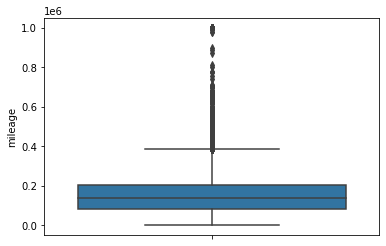

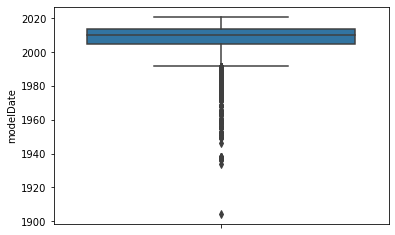

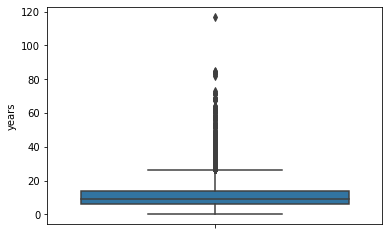

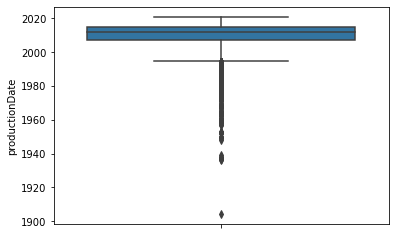

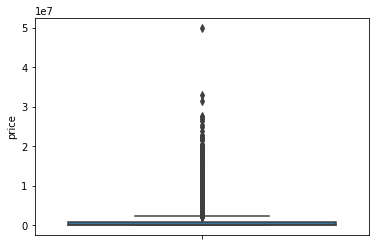

In [106]:
for i in ['mileage', 'modelDate', 'years', 'productionDate', 'price']:
    plt.figure()
    sns.boxplot(y=i, data=cars)
    plt.show()

Вывод: выбросы есть везде, но поскольку mileage и years переведены в категории, это не так важно.
В признаке price стоит подумать, что делать с выбросами.

## <a id="3.3"></a> Обработка категориальных признаков

In [107]:
cars[['bodyType', 'brand', 'color', 'fuelType', 'name', 'vehicleTransmission', 'Привод']].head()

,bodyType,brand,color,fuelType,name,vehicleTransmission,Привод
0,лифтбек,SKODA,синий,бензин,1.2 AMT (105 л.с.),роботизированная,передний
1,лифтбек,SKODA,чёрный,бензин,1.6 MT (110 л.с.),механическая,передний
2,лифтбек,SKODA,серый,бензин,DSG 1.8 AMT (152 л.с.),роботизированная,передний
3,лифтбек,SKODA,коричневый,бензин,1.6 AT (110 л.с.),автоматическая,передний
4,лифтбек,SKODA,белый,бензин,1.8 AT (152 л.с.),автоматическая,передний


Непонятно, как использовать по отдельности признак bodyType

In [108]:
cars.bodyType.unique()

array(['лифтбек', 'внедорожник 5 дв.', 'хэтчбек 5 дв.', 'седан',
       'компактвэн', 'универсал 5 дв.', 'пикап одинарная кабина',
       'хэтчбек 3 дв.', 'купе', 'кабриолет', 'минивэн',
       'пикап двойная кабина', 'внедорожник 3 дв.', 'родстер', 'микровэн',
       'седан 2 дв.', 'купе-хардтоп', 'фастбек', 'тарга',
       'внедорожник открытый', 'лимузин', 'пикап полуторная кабина',
       'седан-хардтоп', 'фургон', 'хэтчбек 4 дв.', 'универсал 3 дв.'],
      dtype=object)

Попробуем создать признак люксовости или нелюксовости 'brandType' в глазах потребителя на основе brand.

Естественно, среди других марок также встречаются дорогие автомобили, но мы выделяем марки, специализирующиеся на более дорогих.

In [109]:
np.sum(cars.brand.isna())

0

In [110]:
cars.brand.unique()

array(['SKODA', 'AUDI', 'HONDA', 'VOLVO', 'BMW', 'NISSAN', 'INFINITI',
       'MERCEDES', 'TOYOTA', 'LEXUS', 'VOLKSWAGEN', 'MITSUBISHI',
       'CHEVROLET', 'LAMBORGHINI', 'MCLAREN', 'DODGE', 'PORSCHE', 'KIA',
       'FORD', 'HYUNDAI', 'CITROEN', 'GAZ', 'VAZ', 'CHRYSLER', 'PEUGEOT',
       'GENESIS', 'BENTLEY', 'ROLLS_ROYCE', 'CADILLAC', 'SUZUKI', 'MINI',
       'LAND_ROVER', 'FIAT', 'GEELY', 'RENAULT', 'MAZDA', 'FERRARI',
       'OPEL', 'TESLA', 'MASERATI', 'JEEP', 'CHERY', 'SSANG_YONG', 'UAZ',
       'DAIHATSU', 'HAVAL', 'JAGUAR', 'GREAT_WALL', 'DAEWOO', 'LIFAN',
       'IRAN_KHODRO', 'SUBARU', 'HUMMER', 'ALFA_ROMEO', 'SEAT', 'ACURA',
       'VORTEX', 'SMART', 'GAC', 'DATSUN', 'ZAZ', 'LUXGEN', 'SAAB',
       'ZOTYE', 'DW_HOWER', 'RAM', 'MOSCVICH', 'MG', 'TATRA', 'SATURN'],
      dtype=object)

In [111]:
luxbrand = ['MERCEDES', 'TESLA', 'CADILLAC', 'BMW','INFINITI', 'AUDI', 'LEXUS', 'MINI', 'PORSCHE', 'JAGUAR', 'PONTIAC', 'LAMBORGHINI', 'CHRYSLER',
       'ROLLS_ROYCE', 'RAM', 'BENTLEY', 'MASERATI', 'HUMMER', 'FERRARI',  'MAYBACH', 'ASTON_MARTIN', 'MCLAREN']

cars['brandType'] = cars.brand.apply(lambda x: 1 if x in luxbrand else 0)

In [112]:
cars['brandType'].unique()

array([0, 1], dtype=int64)

Обработаем признак 'vehicleTransmission'.

Судя по отзывам в интернете автоматическая коробка передач стоит дороже. Спарсенные данные тоже говорят об этом.

In [113]:
np.sum(cars.vehicleTransmission.isna())

0

In [114]:
cars.groupby('vehicleTransmission').price.mean().sort_values()

vehicleTransmission
механическая        252979.689336
вариатор            539034.302667
роботизированная    783199.415648
автоматическая      957568.392617
Name: price, dtype: float64

Создадим категориальный признак 'transmissionCode': мы уже определили, что автоматическая самая дорогая, а механика самая дешёвая. Что касается вариатора и роботизированной коробки - данные здесь и на сайтах расходятся.

In [115]:
cars['transmissionCode'] = cars.vehicleTransmission.apply(lambda x: 2 
                                        if x=='автоматическая' else (0 if x=='механическая' else 1))

Обрабатываем признак fuelType

In [116]:
np.sum(cars.fuelType.isna())

0

In [117]:
cars.fuelType.unique()

array(['бензин', 'дизель', 'гибрид', 'электро', 'газ'], dtype=object)

В статье https://auto.24tv.ua/ru/vybiraem_avto_benzin_dizel_gbo_jelektromobil_gibrid_obzor_n21715 примерно так описываются цены покупки: бензин самый дешёвый, газ немного дороже, дизель дороже существенно, гибрид и электро самые дорогие при покупке.

In [118]:
# дизель в данной выборке дороже, но на это могут быть другие причины
cars.groupby('fuelType').price.mean().sort_values()

fuelType
газ        3.092857e+05
бензин     6.280413e+05
гибрид     8.202110e+05
дизель     1.311116e+06
электро    1.568876e+06
Name: price, dtype: float64

In [119]:
cars['fuelCode'] = cars.fuelType.apply(lambda x: 0 if x=='бензин' or x=='газ'
                                        else (1 if x=='дизель' else 2))

In [120]:
cars[['fuelCode', 'fuelType']]

,fuelCode,fuelType
0,0,бензин
1,0,бензин
2,0,бензин
3,0,бензин
4,0,бензин
...,...,...
68212,0,бензин
68213,0,бензин
68214,0,бензин
68215,0,бензин


Цвет - это довольно индивидуальный выбор: https://autopeople.ru/article/obzory/6841632.html . Можно проверить потом гипотезу, что спорткары дороже яркие, а брэндовые автомобили приобретают чёрные, белые и ,возможно, серебристые.

In [121]:
cars.groupby('color').brand.count().sort_values(ascending=False)

color
чёрный         21196
белый          12865
серый           8406
серебристый     7341
синий           6433
коричневый      3084
красный         3057
зелёный         1719
бежевый         1255
голубой          866
золотистый       482
пурпурный        472
фиолетовый       380
жёлтый           368
оранжевый        272
розовый           21
Name: brand, dtype: int64

In [122]:
cars.groupby('color').price.mean().sort_values(ascending=False)

color
чёрный         931232.295952
оранжевый      899845.455882
белый          839270.764866
коричневый     794947.652724
серый          742471.679990
синий          698576.313695
жёлтый         606598.978261
красный        571581.205757
бежевый        557809.662948
голубой        543771.051963
фиолетовый     472176.847368
пурпурный      418464.976695
серебристый    405858.801526
золотистый     404447.126556
зелёный        340546.157068
розовый        159476.142857
Name: price, dtype: float64

Автомобилей чёрного цвета больше всего, и максимальная стоимость также относится к данному цвету.

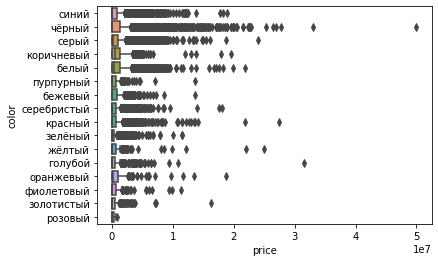

In [123]:
sns.boxplot(x='price', y='color', data=cars)

In [124]:
cars.groupby('color').price.max().sort_values(ascending=False)

color
чёрный         50000000
голубой        31500000
красный        27500000
жёлтый         25000000
серый          23900000
белый          21800000
коричневый     19500000
синий          18900000
оранжевый      18790000
серебристый    18000000
золотистый     16200000
бежевый        13659491
пурпурный      13569030
зелёный        11500000
фиолетовый     11299000
розовый          750000
Name: price, dtype: int64

**Вернуться**
Вывод: пока что неизвестно, как именно использовать color, bodyType и Привод, признак name несёт смысл двух других признаков, не будем его рассматривать.

In [125]:
cars[['bodyType','color', 'Привод']].head()

,bodyType,color,Привод
0,лифтбек,синий,передний
1,лифтбек,чёрный,передний
2,лифтбек,серый,передний
3,лифтбек,коричневый,передний
4,лифтбек,белый,передний


Результат обработок категориальных признаков: придумал несколько новых признаков на основе категориальных 'brandType', 'fuelCode', 'transmissionCode'.

In [126]:
cars[[ 'brandType', 'brand', 'fuelType','fuelCode', 'vehicleTransmission','transmissionCode']].head()

,brandType,brand,fuelType,fuelCode,vehicleTransmission,transmissionCode
0,0,SKODA,бензин,0,роботизированная,1
1,0,SKODA,бензин,0,механическая,0
2,0,SKODA,бензин,0,роботизированная,1
3,0,SKODA,бензин,0,автоматическая,2
4,0,SKODA,бензин,0,автоматическая,2


## <a id="3.4"></a> Обработка бинарных признаков

In [127]:
cars[['ПТС', 'Руль', 'Состояние', 'Таможня']]

,ПТС,Руль,Состояние,Таможня
0,Оригинал,Левый,Не требует ремонта,Растаможен
1,Оригинал,Левый,Не требует ремонта,Растаможен
2,Оригинал,Левый,Не требует ремонта,Растаможен
3,Оригинал,Левый,Не требует ремонта,Растаможен
4,Оригинал,Левый,Не требует ремонта,Растаможен
...,...,...,...,...
68212,Дубликат,Левый,Не требует ремонта,Растаможен
68213,Оригинал,Правый,Не требует ремонта,Растаможен
68214,Дубликат,Левый,Не требует ремонта,Растаможен
68215,Дубликат,Левый,Не требует ремонта,Растаможен


Признак 'ПТС' - дороже авто с оригиналом

In [128]:
cars.groupby('ПТС').price.mean()

ПТС
Дубликат    386628.251897
Оригинал    803642.329511
Name: price, dtype: float64

In [129]:
param = 'Оригинал'
cars['ПТС'] = cars['ПТС'].apply(to_binary)
cars['ПТС']

0        1
1        1
2        1
3        1
4        1
        ..
68212    0
68213    1
68214    0
68215    0
68216    1
Name: ПТС, Length: 68217, dtype: int64

Признак 'Руль'.

На европейской части России леворульное авто обычно дешевле https://www.autonews.ru/news/58259cb09a7947474311ef29

Но спарсенные данные говорят обратное. Возможно, на это влияют какие-то другие факторы. Например, левый руль у автомобилей более высокого класса.

In [130]:
cars.groupby('Руль').price.mean()

Руль
Левый     771637.076674
Правый    209087.132335
Name: price, dtype: float64

In [131]:
# Примем, что автомобили с левым рулём дороже
param = 'Левый'
cars['Руль'] = cars['Руль'].apply(to_binary)
cars['ПТС']

0        1
1        1
2        1
3        1
4        1
        ..
68212    0
68213    1
68214    0
68215    0
68216    1
Name: ПТС, Length: 68217, dtype: int64

Естественно, автомобили, не требующие ремонт, - дороже:

In [132]:
cars.groupby('Состояние').price.mean()

Состояние
Битый / не на ходу    107500.000000
Не требует ремонта    751278.905622
Name: price, dtype: float64

In [133]:
param = 'Не требует ремонта'
cars['Состояние'] = cars['Состояние'].apply(to_binary)
cars['Состояние'].head()

0    1
1    1
2    1
3    1
4    1
Name: Состояние, dtype: int64

Признак 'Таможня'.
Ожидаемо, что растаможенные автомобили дороже. Нет записей с нерастаможенным авто, но всё равно преобразуем, так как потенциально данный признак можно использовать на других данных. Но в обучение брать не имеет смысла.

In [134]:
cars.groupby('Таможня').price.mean()

Таможня
Растаможен    751260.03118
Name: price, dtype: float64

In [135]:
param = 'Растаможен'
cars['Таможня'] = cars['Таможня'].apply(to_binary)
cars['Состояние'].head()

0    1
1    1
2    1
3    1
4    1
Name: Состояние, dtype: int64

In [136]:
cars[['ПТС', 'Руль', 'Состояние', 'Таможня']].head()

,ПТС,Руль,Состояние,Таможня
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


Видно, что цена выше у значений==1, значит категории определены правильно:

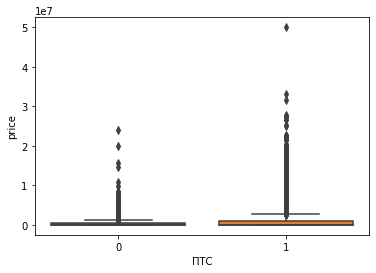

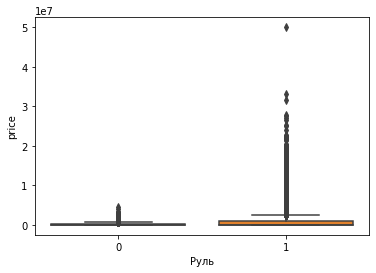

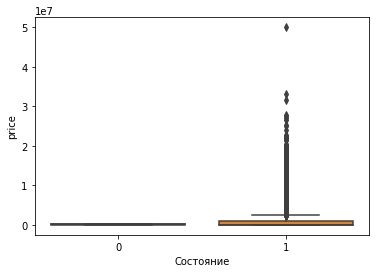

In [137]:
for i in ['ПТС', 'Руль', 'Состояние']:
    plt.figure()
    sns.boxplot(x=i, y='price', data=cars)
    plt.show()

## <a id="3.5"></a> Обработка порядковых признаков

In [138]:
cars[['engineDisplacement', 'enginePower', 'numberOfDoors', 'Владельцы']].head(10)

,engineDisplacement,enginePower,numberOfDoors,Владельцы
0,1.2 LTR,105 N12,5,3 или более
1,1.6 LTR,110 N12,5,1 владелец
2,1.8 LTR,152 N12,5,1 владелец
3,1.6 LTR,110 N12,5,1 владелец
4,1.8 LTR,152 N12,5,1 владелец
5,2.0 LTR,200 N12,5,3 или более
6,1.8 LTR,152 N12,5,1 владелец
7,1.6 LTR,102 N12,5,3 или более
8,1.4 LTR,150 N12,5,1 владелец
9,1.8 LTR,152 N12,5,1 владелец


Из engineDisplacement, enginePower и Владельцы нужно убрать символы кроме цифр и заменить на int. А также не забыть проверить на null, поскольку в engineDisplacement определённо существуют пропуски.

In [139]:
cars.engineDisplacement.unique()

array(['1.2 LTR', '1.6 LTR', '1.8 LTR', '2.0 LTR', '1.4 LTR', '1.3 LTR',
       '1.0 LTR', '3.6 LTR', '1.5 LTR', '1.9 LTR', '2.8 LTR', '1.1 LTR',
       '2.5 LTR', '4.2 LTR', '3.0 LTR', '4.0 LTR', '5.9 LTR', '2.7 LTR',
       '3.1 LTR', '2.4 LTR', '5.2 LTR', '3.2 LTR', '4.1 LTR', '6.3 LTR',
       '2.3 LTR', '6.0 LTR', '2.2 LTR', '3.7 LTR', '2.9 LTR', '5.0 LTR',
       '3.3 LTR', '2.1 LTR', '2.6 LTR', ' LTR', '3.5 LTR', '1.7 LTR',
       '0.7 LTR', '4.4 LTR', '4.8 LTR', '5.4 LTR', '6.6 LTR', '4.9 LTR',
       '3.8 LTR', '3.4 LTR', '3.9 LTR', '4.6 LTR', '5.6 LTR', '4.5 LTR',
       '5.5 LTR', '6.2 LTR', '4.7 LTR', '4.3 LTR', '5.8 LTR', '5.3 LTR',
       '5.7 LTR', '6.8 LTR', '0.8 LTR', '6.4 LTR', '6.5 LTR', '0.9 LTR',
       '0.6 LTR'], dtype=object)

Для обработки engineDisplacement, enginePower снова воспользуемся sub из библиотеки re и lambda функцией

Преобразуем признак 'engineDisplacement'

In [140]:
float(re.sub('[LTR]','', cars.engineDisplacement[0]))

1.2

In [141]:
cars.engineDisplacement = cars.engineDisplacement.apply(lambda x: re.sub(' LTR', '', x) if x!=' LTR' else None)

In [142]:
cars.engineDisplacement.unique()

array(['1.2', '1.6', '1.8', '2.0', '1.4', '1.3', '1.0', '3.6', '1.5',
       '1.9', '2.8', '1.1', '2.5', '4.2', '3.0', '4.0', '5.9', '2.7',
       '3.1', '2.4', '5.2', '3.2', '4.1', '6.3', '2.3', '6.0', '2.2',
       '3.7', '2.9', '5.0', '3.3', '2.1', '2.6', None, '3.5', '1.7',
       '0.7', '4.4', '4.8', '5.4', '6.6', '4.9', '3.8', '3.4', '3.9',
       '4.6', '5.6', '4.5', '5.5', '6.2', '4.7', '4.3', '5.8', '5.3',
       '5.7', '6.8', '0.8', '6.4', '6.5', '0.9', '0.6'], dtype=object)

Посчитаем пропуски

In [143]:
sum(cars.engineDisplacement.isna())

153

У тех автомобилей, у которых nan в engineDisplacement, информация об объёме двигателя в признаке vehicleConfiguration также отсутствует:

In [144]:
cars[cars.engineDisplacement.isna()].vehicleConfiguration

5241       ALLROAD_5_DOORS AUTOMATIC
7992     HATCHBACK_5_DOORS AUTOMATIC
8252     HATCHBACK_5_DOORS AUTOMATIC
8350     HATCHBACK_5_DOORS AUTOMATIC
8684     HATCHBACK_5_DOORS AUTOMATIC
                    ...             
56669                COUPE AUTOMATIC
59755    HATCHBACK_5_DOORS AUTOMATIC
64070      ALLROAD_5_DOORS AUTOMATIC
64806      ALLROAD_5_DOORS AUTOMATIC
65532      ALLROAD_5_DOORS AUTOMATIC
Name: vehicleConfiguration, Length: 153, dtype: object

In [145]:
# Преобразуем во float
cars.engineDisplacement = cars.engineDisplacement.astype(float)

In [146]:
# сначала заменим nan
cars.engineDisplacement.fillna(round(np.mean(cars.engineDisplacement),1), inplace = True)
cars.engineDisplacement.unique()

array([1.2, 1.6, 1.8, 2. , 1.4, 1.3, 1. , 3.6, 1.5, 1.9, 2.8, 1.1, 2.5,
       4.2, 3. , 4. , 5.9, 2.7, 3.1, 2.4, 5.2, 3.2, 4.1, 6.3, 2.3, 6. ,
       2.2, 3.7, 2.9, 5. , 3.3, 2.1, 2.6, 3.5, 1.7, 0.7, 4.4, 4.8, 5.4,
       6.6, 4.9, 3.8, 3.4, 3.9, 4.6, 5.6, 4.5, 5.5, 6.2, 4.7, 4.3, 5.8,
       5.3, 5.7, 6.8, 0.8, 6.4, 6.5, 0.9, 0.6])

Теперь преобразуем enginePower

In [147]:
cars.enginePower.unique()

array(['105 N12', '110 N12', '152 N12', '200 N12', '102 N12', '150 N12',
       '90 N12', '180 N12', '220 N12', '122 N12', '70 N12', '140 N12',
       '125 N12', '54 N12', '86 N12', '75 N12', '64 N12', '95 N12',
       '260 N12', '170 N12', '80 N12', '68 N12', '160 N12', '115 N12',
       '280 N12', '53 N12', '60 N12', '143 N12', '42 N12', '101 N12',
       '58 N12', '193 N12', '79 N12', '30 N12', '100 N12', '50 N12',
       '163 N12', '225 N12', '420 N12', '211 N12', '245 N12', '560 N12',
       '500 N12', '249 N12', '450 N12', '605 N12', '250 N12', '354 N12',
       '120 N12', '290 N12', '230 N12', '350 N12', '204 N12', '255 N12',
       '340 N12', '177 N12', '272 N12', '372 N12', '210 N12', '130 N12',
       '300 N12', '190 N12', '239 N12', '435 N12', '333 N12', '271 N12',
       '326 N12', '238 N12', '310 N12', '233 N12', '252 N12', '133 N12',
       '460 N12', '520 N12', '400 N12', '525 N12', '367 N12', '265 N12',
       '550 N12', '580 N12', '88 N12', '165 N12', '430 N12', '335 N

In [148]:
# Посчитаем пропуски
np.sum(cars.enginePower.isna())

0

In [149]:
re.sub(' N12', '', cars.enginePower[0])

'105'

In [150]:
# преобразуем в int
cars.enginePower = cars.enginePower.apply(lambda x: int(re.sub(' N12', '', x)))

In [151]:
cars.enginePower.unique()

array([105, 110, 152, 200, 102, 150,  90, 180, 220, 122,  70, 140, 125,
        54,  86,  75,  64,  95, 260, 170,  80,  68, 160, 115, 280,  53,
        60, 143,  42, 101,  58, 193,  79,  30, 100,  50, 163, 225, 420,
       211, 245, 560, 500, 249, 450, 605, 250, 354, 120, 290, 230, 350,
       204, 255, 340, 177, 272, 372, 210, 130, 300, 190, 239, 435, 333,
       271, 326, 238, 310, 233, 252, 133, 460, 520, 400, 525, 367, 265,
       550, 580,  88, 165, 430, 335, 174, 224, 136, 256, 338, 112, 218,
       360,  93, 182, 113, 240, 270, 137, 155,  61, 254, 116,  71, 285,
       408, 166, 156, 257, 201, 162, 194, 142, 154, 147, 281, 243, 118,
       128,  91,  83, 205, 247, 188, 295, 275,  78, 109,  94, 185, 258,
       145, 132, 135,  52,  66, 124,  98, 215, 158,  99, 103, 131, 126,
       235, 181, 315, 203, 231,  82, 304, 175, 320, 213, 144, 146, 151,
       111, 286, 306, 107, 184, 313, 264, 575, 407, 192, 129, 555, 625,
       329, 370, 381, 269, 600, 510, 544, 462, 355, 507, 609, 43

Обработаем признак 'Владельцы' функцией to_digit, определённой ранее

In [152]:
np.sum(cars['Владельцы'].isna())

0

In [153]:
# Снова воспользуемся sub из библиотеки re и lambda функцией to_digit
cars['Владельцы']= cars['Владельцы'].apply(to_digit)
cars['Владельцы'].head()

0    3
1    1
2    1
3    1
4    1
Name: Владельцы, dtype: int64

In [154]:
cars['Владельцы'].unique()

array([3, 1, 2], dtype=int64)

Признак Владельцы чем больше, тем хуже, поэтому нужно его переделать (под названием 'Owners')

In [155]:
cars['Owners'] = cars['Владельцы'].apply(lambda x: 0 if x>=3 else (1 if x==2 else 2))
cars['Owners'].unique()

array([0, 2, 1], dtype=int64)

Признак numberOfDoors заменять не нужно, но нужно привести к общим категориям от 0

In [156]:
cars.numberOfDoors.unique()

array([5, 4, 2, 3, 0], dtype=int64)

In [157]:
# если авто 4-х дверное: 2; 2-х дверное: 1; 0: 0.
cars.numberOfDoors = cars.numberOfDoors.apply(lambda x: 2 if x>=4 else (1 if x>=2 else 0))
cars.numberOfDoors.unique()

array([2, 1, 0], dtype=int64)

In [158]:
np.sum(cars.numberOfDoors.isna())

0

In [159]:
cars[['engineDisplacement', 'enginePower', 'numberOfDoors', 'Owners']].head(10)

,engineDisplacement,enginePower,numberOfDoors,Owners
0,1.2,105,2,0
1,1.6,110,2,2
2,1.8,152,2,2
3,1.6,110,2,2
4,1.8,152,2,2
5,2.0,200,2,0
6,1.8,152,2,2
7,1.6,102,2,0
8,1.4,150,2,2
9,1.8,152,2,2


## <a id="3.6"></a> Обработка выбросов

Видно большое количество выбросов, но удалять их не стоит, тк их много и они могут быть значимы для модели.

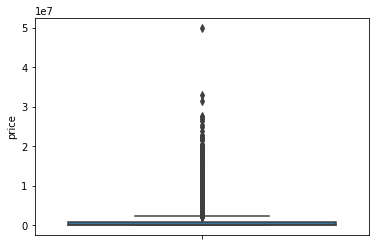

In [160]:
sns.boxplot(y='price', data=cars)

Посмотрим, сколько автомобилей выходят за границы по стоимости.

In [161]:
IQR = cars['price'].quantile(0.75) - cars['price'].quantile(0.25)
perc25 = cars['price'].quantile(0.25)
perc75 = cars['price'].quantile(0.75)
print('В признаке ', cars['price'].name,' 25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "\nIQR: {}, ".format(IQR), " \nГраницы выбросов [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR),'\n')

В признаке  price  25-й перцентиль: 0.0, 75-й перцентиль: 990000.0, 
IQR: 990000.0,   
Границы выбросов [-1485000.0, 2475000.0]. 



Вывод: 353 автомобиля выходят за границы стоимости, пока не стоит их удалять или заменять, но после можно заменить на верхнюю границу (high_border)

In [162]:
high_border = perc75 + 1.5*IQR
cars[cars.price>high_border].price.count()

5488

In [163]:
high_border

2475000.0

## <a id="3.7"></a> Рассмотрение признаков на предмет нормализации:

**Числовые:**

In [164]:
cars.enginePower.unique()

array([105, 110, 152, 200, 102, 150,  90, 180, 220, 122,  70, 140, 125,
        54,  86,  75,  64,  95, 260, 170,  80,  68, 160, 115, 280,  53,
        60, 143,  42, 101,  58, 193,  79,  30, 100,  50, 163, 225, 420,
       211, 245, 560, 500, 249, 450, 605, 250, 354, 120, 290, 230, 350,
       204, 255, 340, 177, 272, 372, 210, 130, 300, 190, 239, 435, 333,
       271, 326, 238, 310, 233, 252, 133, 460, 520, 400, 525, 367, 265,
       550, 580,  88, 165, 430, 335, 174, 224, 136, 256, 338, 112, 218,
       360,  93, 182, 113, 240, 270, 137, 155,  61, 254, 116,  71, 285,
       408, 166, 156, 257, 201, 162, 194, 142, 154, 147, 281, 243, 118,
       128,  91,  83, 205, 247, 188, 295, 275,  78, 109,  94, 185, 258,
       145, 132, 135,  52,  66, 124,  98, 215, 158,  99, 103, 131, 126,
       235, 181, 315, 203, 231,  82, 304, 175, 320, 213, 144, 146, 151,
       111, 286, 306, 107, 184, 313, 264, 575, 407, 192, 129, 555, 625,
       329, 370, 381, 269, 600, 510, 544, 462, 355, 507, 609, 43

Признаки enginePower и engineDisplacement не нормализованы.

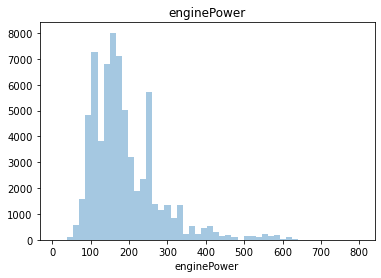

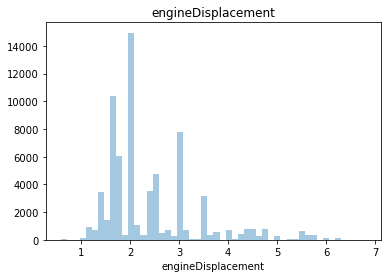

In [165]:
for i in ['enginePower', 'engineDisplacement']:
    plt.figure()
    sns.distplot(cars[i], kde = False, rug=False)
    plt.title(i)
    plt.show()

Перед тем как нормализовать данные признаки можно создать соответсвтующие им категориальные:

Обработка engineDisplacement - создание признака engineDisplacementCode

In [166]:
cars.engineDisplacement.unique()

array([1.2, 1.6, 1.8, 2. , 1.4, 1.3, 1. , 3.6, 1.5, 1.9, 2.8, 1.1, 2.5,
       4.2, 3. , 4. , 5.9, 2.7, 3.1, 2.4, 5.2, 3.2, 4.1, 6.3, 2.3, 6. ,
       2.2, 3.7, 2.9, 5. , 3.3, 2.1, 2.6, 3.5, 1.7, 0.7, 4.4, 4.8, 5.4,
       6.6, 4.9, 3.8, 3.4, 3.9, 4.6, 5.6, 4.5, 5.5, 6.2, 4.7, 4.3, 5.8,
       5.3, 5.7, 6.8, 0.8, 6.4, 6.5, 0.9, 0.6])

Возьмём категории с сайта https://blog.autospot.ru/guide/transportnyj-nalog:

* 0 микролитражные (не больше 1,1 литра);
* 1 малолитражные (от 1,2 до 1,7 литра);
* 2 среднелитражные (от 1,8 до 3,5 литра);
* 3 крупнолитражные (от 3,6 и больше).

In [167]:
cars['engineDisplacementCode'] = cars.engineDisplacement.apply(lambda x: 0 if x<=1.1 else 
                                                        (1 if x<=1.7 else (2 if x<=3.5 else 3)))
cars.engineDisplacementCode.unique()

array([1, 2, 0, 3], dtype=int64)

Обработка enginePower - создание признака enginePowerCode

In [168]:
cars.enginePower.unique()

array([105, 110, 152, 200, 102, 150,  90, 180, 220, 122,  70, 140, 125,
        54,  86,  75,  64,  95, 260, 170,  80,  68, 160, 115, 280,  53,
        60, 143,  42, 101,  58, 193,  79,  30, 100,  50, 163, 225, 420,
       211, 245, 560, 500, 249, 450, 605, 250, 354, 120, 290, 230, 350,
       204, 255, 340, 177, 272, 372, 210, 130, 300, 190, 239, 435, 333,
       271, 326, 238, 310, 233, 252, 133, 460, 520, 400, 525, 367, 265,
       550, 580,  88, 165, 430, 335, 174, 224, 136, 256, 338, 112, 218,
       360,  93, 182, 113, 240, 270, 137, 155,  61, 254, 116,  71, 285,
       408, 166, 156, 257, 201, 162, 194, 142, 154, 147, 281, 243, 118,
       128,  91,  83, 205, 247, 188, 295, 275,  78, 109,  94, 185, 258,
       145, 132, 135,  52,  66, 124,  98, 215, 158,  99, 103, 131, 126,
       235, 181, 315, 203, 231,  82, 304, 175, 320, 213, 144, 146, 151,
       111, 286, 306, 107, 184, 313, 264, 575, 407, 192, 129, 555, 625,
       329, 370, 381, 269, 600, 510, 544, 462, 355, 507, 609, 43

Возьмём за основу категории по транспортному налогу https://osago-gosuslugi.ru/transportnyy-nalog/:

* 0-100
* 100-150
* 150-200
* 200-250
* 251

In [169]:
cars['enginePowerCode'] = cars.enginePower.apply(lambda x: 0 if x<=100 else
                                              (1 if x<=150 else (2 if x<=200 else (3 if x<=250 else 4))))
cars['enginePowerCode'].unique()

array([1, 2, 0, 3, 4], dtype=int64)

Нормализация базовых признаков:

In [170]:
for i in ['engineDisplacement', 'enginePower']:
    cars[i] = cars[i].apply(lambda x: np.log(x+1))

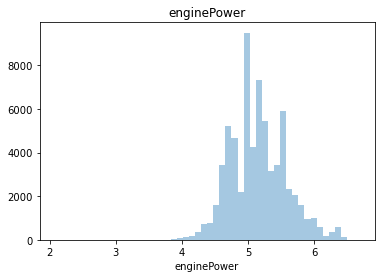

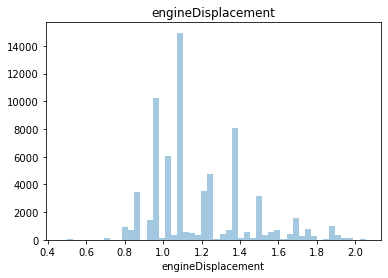

In [171]:
# графики после нормализации
for i in ['enginePower', 'engineDisplacement']:
    plt.figure()
    sns.distplot(cars[i], kde = False, rug=False)
    plt.title(i)
    plt.show()

Рассмотрим признаки ещё раз перед подачей в модель

**Категориальные:**

In [172]:
cars.numberOfDoors.unique()

array([2, 1, 0], dtype=int64)

In [173]:
cars['Owners'].unique()

array([0, 2, 1], dtype=int64)

In [174]:
cars.transmissionCode.unique()

array([1, 0, 2], dtype=int64)

In [175]:
cars.fuelCode.unique()

array([0, 1, 2], dtype=int64)

In [176]:
cars.yearsRange.unique()

array([2, 1, 3, 0], dtype=int64)

In [177]:
cars.mileRange.unique()

array([2, 3, 0, 1], dtype=int64)

**Бинарные**

In [178]:
cars['ПТС'].unique()

array([1, 0], dtype=int64)

In [179]:
cars['Состояние'].unique()

array([1, 0], dtype=int64)

In [180]:
cars['Таможня'].unique()

array([1], dtype=int64)

In [182]:
cars['brandType'].unique()

array([0, 1], dtype=int64)

In [488]:
cars['Руль'].unique()

array([1, 0], dtype=int64)

## <a id="3.8"></a> Изучение влияния признаков на целевой

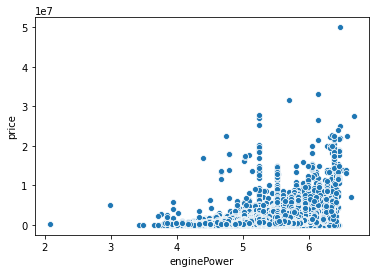

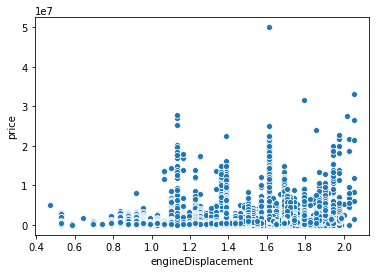

In [186]:
for i in ['enginePower', 'engineDisplacement']:
    plt.figure()
    sns.scatterplot(y='price', x=i, data=cars)
    plt.show()

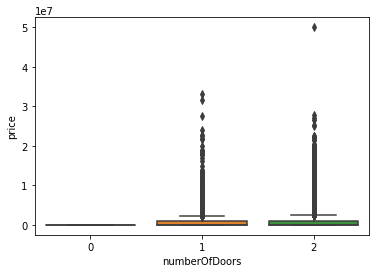

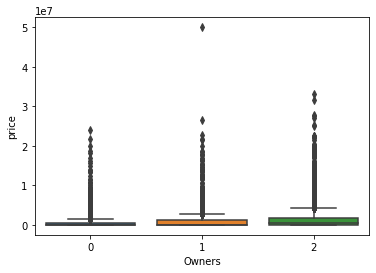

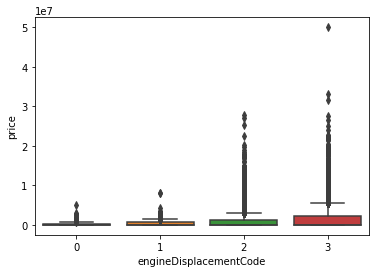

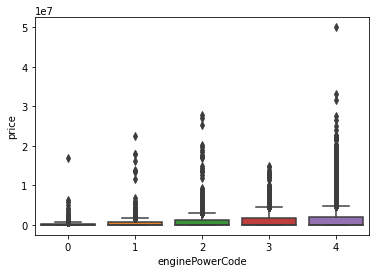

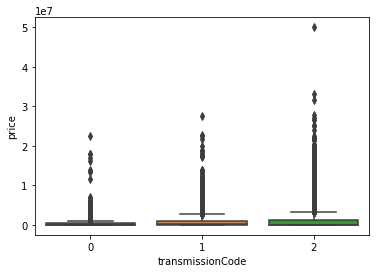

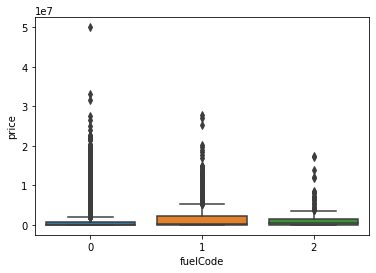

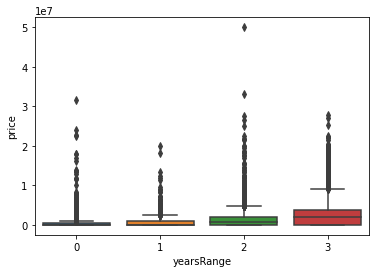

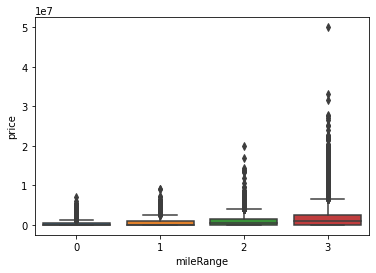

In [192]:
for i in ['numberOfDoors', 'Owners', 'engineDisplacementCode', 'enginePowerCode', 'transmissionCode', 'fuelCode', 'yearsRange', 'mileRange']:
    plt.figure()
    sns.boxplot(y='price', x=i, data=cars)
    plt.show()

Из-за выбросов тяжело понять, влияние признаков на целевой.

Сильных корреляций с целевым признаком не наблюдается:

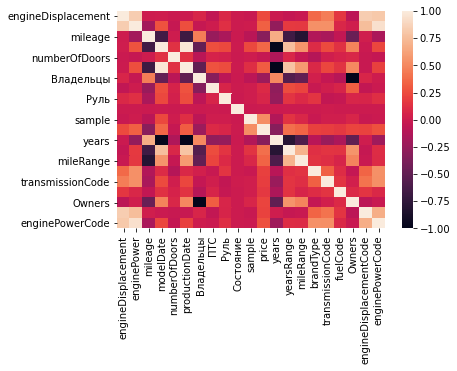

In [506]:
sns.heatmap(cars.drop('Таможня', axis=1).corr())

## <a id="3.9"></a> Копия датафрейма для экспериментов

Ранее мы определяли верхнюю границу выбросов:

In [494]:
high_border

2475000.0

Создадим копию датафрейма, в которой выбросы заменены на верхнюю границу.

In [188]:
carsv1 = cars.copy()

In [189]:
carsv1.price = carsv1.price.apply(lambda x: high_border if x>= high_border else x)

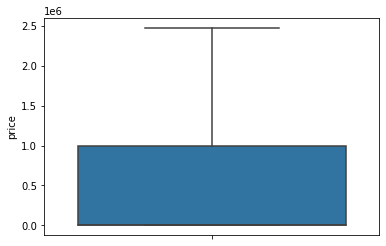

In [190]:
sns.boxplot(y='price', data=carsv1)

Посмотрим на влияние признаков без выбросов в целевом признаке:

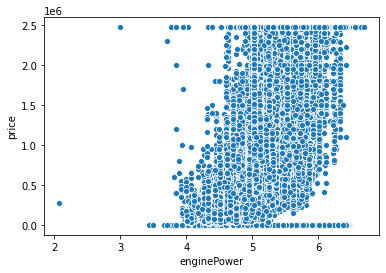

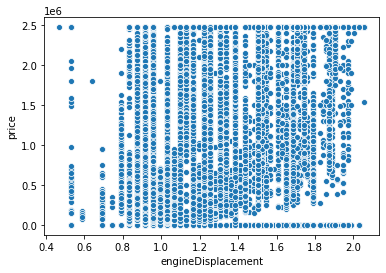

In [191]:
# с количественными признаками
for i in ['enginePower', 'engineDisplacement']:
    plt.figure()
    sns.scatterplot(y='price', x=i, data=carsv1)
    plt.show()

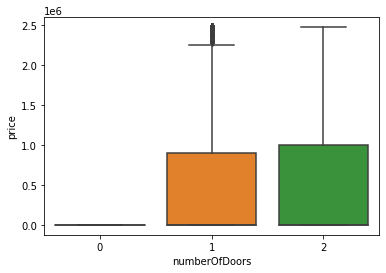

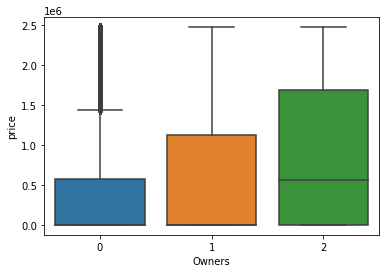

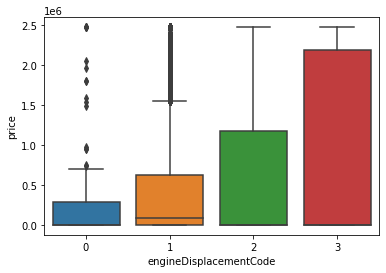

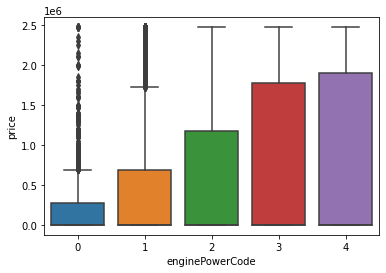

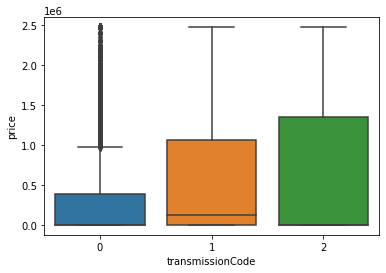

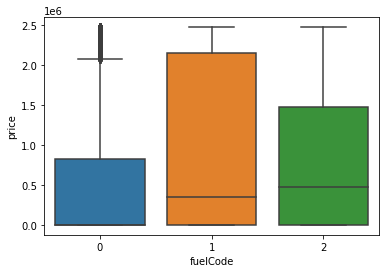

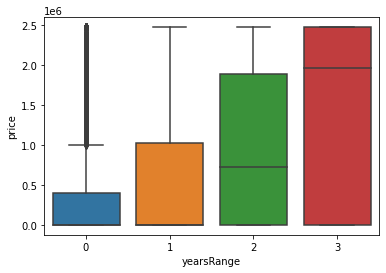

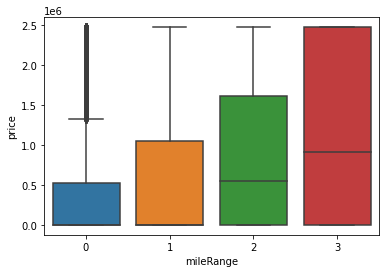

In [193]:
# с категориальными и порядковыми признаками
for i in ['numberOfDoors', 'Owners', 'engineDisplacementCode', 'enginePowerCode', 'transmissionCode', 'fuelCode', 'yearsRange', 'mileRange']:
    plt.figure()
    sns.boxplot(y='price', x=i, data=carsv1)
    plt.show()

Вывод: без выбросов в целевом признаке влияние признаков на целевой гораздо более заметно. После обучения модели на данных выбросами надо попробовать обучить на очищенных от выбросов данных carsv1.

<a id='4'> <a>
# Обучение различных моделей регрессии

## <a id='4.1'> <a> Baseline - LinearRegression

Создадим простую модель линейной регрессии и посмотрим на метрику

Теперь можно разбивать на train и test:

In [194]:
# Теперь выделим тестовую часть
train_data = cars.query('sample == 1').drop(['sample'], axis=1)
test_data = cars.query('sample == 0').drop(['sample'], axis=1)

In [195]:
train_data

,bodyType,brand,car_url,color,description,engineDisplacement,enginePower,fuelType,image,mileage,...,price,years,yearsRange,mileRange,brandType,transmissionCode,fuelCode,Owners,engineDisplacementCode,enginePowerCode
34686,седан,MERCEDES,https://auto.ru/cars/used/sale/mercedes/e_klas...,чёрный,Автомобиль в который вложена Душа не требует о...,1.435085,5.398163,бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,240000,...,3000000,27,0,0,1,2,0,0,2,3
34687,хэтчбек 5 дв.,CHEVROLET,https://auto.ru/cars/used/sale/chevrolet/aveo/...,белый,Я СОБСТВЕННИК!!! НЕ ПЕРЕКУП\nМашина в основном...,0.955511,4.753590,бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,53800,...,638000,8,1,3,0,2,0,0,1,1
34688,внедорожник 5 дв.,LAMBORGHINI,https://auto.ru/cars/used/sale/lamborghini/uru...,жёлтый,Год выпуска: 2019. Пробег: 40 100 км. Кузов: в...,1.609438,6.478510,бензин,https://autoru.naydex.net/dVb17C804/f1af98yqCU...,40100,...,22000000,2,3,3,1,2,0,2,3,4
34689,седан,BMW,https://auto.ru/cars/used/sale/bmw/m3/11034070...,синий,"M3 2016 Рестайлинг,Individual в цвете tanzanit...",1.386294,6.068426,бензин,https://autoru.naydex.net/dVb17C804/f1af98yqCU...,50000,...,4740000,5,2,3,1,1,0,1,2,4
34690,купе,MCLAREN,https://auto.ru/cars/used/sale/mclaren/720s/11...,чёрный,"В продаже McLaren 720S Perfomance, в идеальном...",1.609438,6.580639,бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,4500,...,22500000,3,2,3,1,1,0,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68212,хэтчбек 5 дв.,HONDA,https://auto.ru/cars/used/sale/honda/civic/110...,красный,"Машина в отличном состоянии, есть что передела...",0.916291,4.753590,бензин,https://autoru.naydex.net/VyLm91f05/4c3ef9yM_4...,373317,...,210000,22,0,0,0,0,0,0,1,1
68213,компактвэн,HONDA,https://auto.ru/cars/used/sale/honda/stream/11...,серебристый,Продам свою ласточку или поменяю на более деше...,0.993252,4.875197,бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,311000,...,330000,19,0,0,0,2,0,0,1,1
68214,седан,HONDA,https://auto.ru/cars/used/sale/honda/civic/110...,серый,"Продаю личный автомобиль. Технически исправен,...",1.029619,4.948760,бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,196000,...,430000,13,0,0,0,0,0,0,2,1
68215,хэтчбек 5 дв.,HONDA,https://auto.ru/cars/used/sale/honda/civic/110...,синий,"В нормальном состоянии, требует внимание кузов...",0.875469,4.510860,бензин,https://autoru.naydex.net/VyLm91f05/4c3ef9yM_4...,350000,...,135000,21,0,0,0,0,0,0,1,0


In [515]:
np.sum(train_data.isna())

bodyType                  0
brand                     0
car_url                   0
color                     0
description               0
engineDisplacement        0
enginePower               0
fuelType                  0
image                     0
mileage                   0
modelDate                 0
model_name                0
name                      0
numberOfDoors             0
productionDate            0
vehicleConfiguration      0
vehicleTransmission       0
Владельцы                 0
ПТС                       0
Привод                    0
Руль                      0
Состояние                 0
Таможня                   0
price                     0
years                     0
yearsRange                0
mileRange                 0
brandType                 0
transmissionCode          0
fuelCode                  0
Owners                    0
engineDisplacementCode    0
enginePowerCode           0
dtype: int64

Для обучения сначала берутся 'engineDisplacement', 'enginePower' вместо 2-х категориальных признаков, созданных на их основе

In [196]:
bin_cols = ['ПТС', 'Состояние', 'Руль', 'brandType']
cat_cols = ['numberOfDoors', 'Owners', 'transmissionCode', 'fuelCode', 'yearsRange', 'mileRange']
dig_cols = ['engineDisplacement', 'enginePower']

In [197]:
X = train_data[bin_cols+cat_cols+dig_cols]
y = train_data.price

In [198]:
X

,ПТС,Состояние,Руль,brandType,numberOfDoors,Owners,transmissionCode,fuelCode,yearsRange,mileRange,engineDisplacement,enginePower
34686,1,1,1,1,2,0,2,0,0,0,1.435085,5.398163
34687,1,1,1,0,2,0,2,0,1,3,0.955511,4.753590
34688,1,1,1,1,2,2,2,0,3,3,1.609438,6.478510
34689,1,1,1,1,2,1,1,0,2,3,1.386294,6.068426
34690,1,1,1,1,1,2,1,0,2,3,1.609438,6.580639
...,...,...,...,...,...,...,...,...,...,...,...,...
68212,0,1,1,0,2,0,0,0,0,0,0.916291,4.753590
68213,1,1,0,0,2,0,2,0,0,0,0.993252,4.875197
68214,0,1,1,0,2,0,0,0,0,0,1.029619,4.948760
68215,0,1,1,0,2,0,0,0,0,0,0.875469,4.510860


In [199]:
y

34686     3000000
34687      638000
34688    22000000
34689     4740000
34690    22500000
           ...   
68212      210000
68213      330000
68214      430000
68215      135000
68216      210000
Name: price, Length: 33531, dtype: int64

In [200]:
np.sum(X.isna())

ПТС                   0
Состояние             0
Руль                  0
brandType             0
numberOfDoors         0
Owners                0
transmissionCode      0
fuelCode              0
yearsRange            0
mileRange             0
engineDisplacement    0
enginePower           0
dtype: int64

У признаков enginePower и engineDisplacement корреляция, не совсем понятно, какой общий признак можно создать из них, при этом они обозначают разное. Поэтому необходимо обучить с 2-мя признаками и с каждым по отдельности.

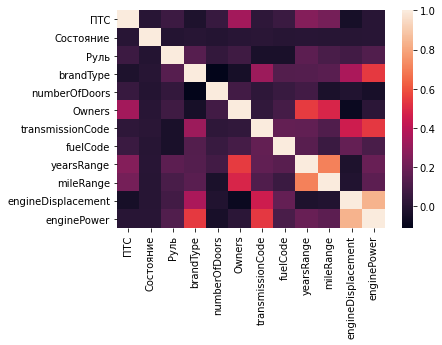

In [202]:
sns.heatmap(X.corr())

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Необходимо логарифмировать целевой признак при обучении, а при возвращении тестового значения применять функцию экспоненты.

In [204]:
clf = LinearRegression()
clf.fit(X_train, np.log(y_train))

LinearRegression()

In [205]:
y_pred = np.exp(clf.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, y_pred))*100:0.2f}%")

Точность модели по метрике MAPE: 32.16%


In [527]:
d = {'y_test': y_test, 'y_pred': y_pred}

In [528]:
# значения разнятся
pd.DataFrame(data=d)

,y_test,y_pred
35612,879000,1.358267e+06
54877,2450000,3.218279e+06
49037,900000,9.237079e+05
37615,1648000,1.299161e+06
59937,400000,3.916716e+05
...,...,...
60962,215000,2.376009e+05
63790,1555000,1.772487e+06
40507,650000,9.824922e+05
42979,1350000,9.338957e+05


## <a id='4.2'> <a> Модель CatBoost

In [206]:
model = CatBoostRegressor(iterations = 5000,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, np.log(y_train),
         #cat_features=cat_features_ids,
         eval_set=(X_test, np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         #plot=True
         )

model.save_model('catboost_single_model_2_baseline.model')
predict_test = np.exp(model.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 20.36%


### Различный темп обучения

Попробуем подобрать темп в модели CatBoost, при котором значение метрики будет наилучшим.

In [530]:
# 0.5
model = CatBoostRegressor(iterations = 5000,
                          learning_rate = 0.5,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, np.log(y_train),
         #cat_features=cat_features_ids,
         eval_set=(X_test, np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         plot=True
         )

predict_test = np.exp(model.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Точность модели по метрике MAPE: 19.92%


In [532]:
# 0.05
model = CatBoostRegressor(iterations = 5000,
                          learning_rate = 0.05,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, np.log(y_train),
         #cat_features=cat_features_ids,
         eval_set=(X_test, np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         plot=True
         )

predict_test = np.exp(model.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Точность модели по метрике MAPE: 19.99%


In [218]:
# 0.01
model = CatBoostRegressor(iterations = 5000,
                          learning_rate = 0.01,
                          random_seed = 42,
                          eval_metric='MAPE',
                          #custom_metric=['R2', 'MAE'],
                          silent=True,
#                           od_wait = 100,
#                           od_type = 'Iter'                  
                         )
model.fit(X_train, np.log(y_train),
         #cat_features=cat_features_ids,
         eval_set=(X_test, np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         plot=True
         )

predict_test = np.exp(model.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Точность модели по метрике MAPE: 21.96%


In [219]:
# 0.1
model = CatBoostRegressor(iterations = 5000,
                          learning_rate = 0.1,
                          random_seed = 42,
                          eval_metric='MAPE',
                          #custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, np.log(y_train),
         #cat_features=cat_features_ids,
         eval_set=(X_test, np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         #plot=True
         )

predict_test = np.exp(model.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 19.71%


Вывод: точность повысилась  при указании темпа обучения 0.1.

**Оценим значимость признаков:**

In [534]:
f_importance = pd.DataFrame(columns=X.columns)
f_importance.loc[0] = model.feature_importances_

In [535]:
# Оценим значимость признаков:
f_importance

,ПТС,Состояние,Руль,brandType,numberOfDoors,Owners,transmissionCode,fuelCode,yearsRange,mileRange,engineDisplacement,enginePower
0,0.532877,0.003513,1.049632,2.887061,0.91885,3.014494,3.822208,6.365543,26.389489,10.187328,15.303227,29.52578


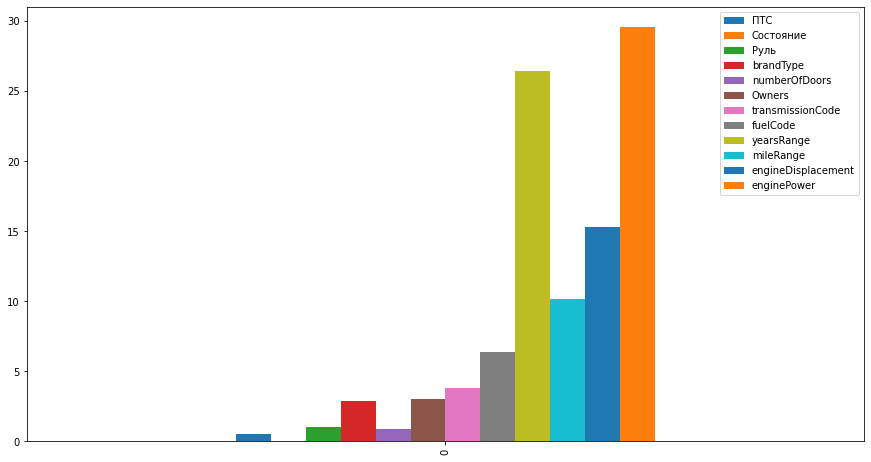

In [536]:
# график
f_importance.plot(kind='bar',  figsize = (15, 8))

Значимости признаков:
1, 2 и 3 - enginePower, yearsRange и engineDisplacement, 4, 5, 6 - brandType, mileRange, transmissionCode

### Кросс-валидация

In [ ]:
# from catboost import cv

In [ ]:
# from catboost import Pool

In [ ]:
# params = {}
# params['loss_function'] = 'MAPE'
# params['iterations'] = 100
# params['random_seed'] = 42
# params['learning_rate'] = 0.01

# cv_data = cv(params=params,
#              pool = Pool(X, label=y, feature_names = bin_cols+cat_cols+dig_cols),
#              fold_count = 5,
#              shuffle = True,
#              stratified = False,
#              plot = True,
#              verbose=False)

In [ ]:
# cv_data

## <a id='4.3'> <a>Подбор параметров других моделей

Подберём лучшие параметры различных моделей. GridSearch работает очень долго, поэтому будем использовать возврат функций get_models() и evaluate_model() для оценки каждого отдельного параметра.

При этом функцию каждый раз переопределяем, тк модель не принимается как аргумент функции

##### 1. GradientBoostingClassifier

In [538]:
grbost = GradientBoostingRegressor()

In [541]:
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 26.16%


Точность при дефолтных параметрах лучше, чем в BaseLine (там было 32.16)

In [ ]:
# набор метрик, которые будут использоваться, для напоминания:
sorted(sklearn.metrics.SCORERS.keys())

Параметр **глубина дерева**

In [ ]:
#get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,100,10):
        models[str(i)] = GradientBoostingRegressor(max_depth=i)
    return models

#evaluate a give model using cross-validation
def evaluate_model(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

Чтобы облегчить понимание, посмотрим содержимое создаваемых массивов и словарей:

In [ ]:
scores

In [ ]:
models

In [ ]:
names

In [ ]:
results

In [ ]:
# max_depth=5
grbost = GradientBoostingRegressor(max_depth=5)

grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))

In [ ]:
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
# max_depth=11
grbost = GradientBoostingRegressor(max_depth=11)

grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))

In [ ]:
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
# max_depth=20
grbost = GradientBoostingRegressor(max_depth=20)

grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))

In [ ]:
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Вывод: лучшая точность модели при огранчении глубины дерева до 5.

Параметр **скорость обучения**

In [ ]:
#get a list of models to evaluate
def get_models_lr():
    models = dict()
    rates = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]
    for r in rates:
        key = '%.4f' % r
        models[key] = GradientBoostingRegressor(learning_rate=r)
    return models

#evaluate a give model using cross-validation
def evaluate_model_lr(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_lr()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_lr(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [542]:
# lr = 0.0001
grbost = GradientBoostingRegressor(learning_rate=0.0001)
grbost.fit(X_train, np.log(y_train))

predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 107.64%


In [543]:
# lr = 0.001
grbost = GradientBoostingRegressor(learning_rate=0.001)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 97.08%


In [544]:
# lr = 0.01
grbost = GradientBoostingRegressor(learning_rate=0.01)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 49.44%


In [545]:
# lr = 0.1 - по умолчанию
grbost = GradientBoostingRegressor(learning_rate=0.1)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 26.16%


Вывод: лучшая точность модели при скорости по умолчанию

Параметр **количество деревьев**

In [ ]:
#get a list of models to evaluate
def get_models_ne():
    models = dict()
    n_estimators = [25, 50, 100, 250, 350, 500, 750, 1000]
    for n in n_estimators:
        models[n] = GradientBoostingRegressor(n_estimators=n)
    return models

#evaluate a give model using cross-validation
def evaluate_model_ne(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_ne()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_ne(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

Где-то  500 деревьев дают лучший результат, но можно взять и 350

In [546]:
# n_estimators = 200
grbost = GradientBoostingRegressor(n_estimators=200)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 24.72%


In [547]:
# n_estimators = 350
grbost = GradientBoostingRegressor(n_estimators=350)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 23.70%


In [548]:
# n_estimators = 500
grbost = GradientBoostingRegressor(n_estimators=500)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 23.10%


Параметр **количество признаков**

In [ ]:
#get a list of models to evaluate
def get_models_mf():
    models = dict()
    for m in range(1,13):
        models[m] = GradientBoostingRegressor(max_features=m)
    return models

#evaluate a give model using cross-validation
def evaluate_model_mf(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_mf()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_mf(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
# max_features = 1
grbost = GradientBoostingRegressor(max_features = 1)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [247]:
# max_features = 5
grbost = GradientBoostingRegressor(max_features = 5)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 32.77%


In [250]:
# max_features = 6
grbost = GradientBoostingRegressor(max_features = 6)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 32.95%


In [249]:
# max_features = 8
grbost = GradientBoostingRegressor(max_features = 5)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 33.20%


In [248]:
# max_features = 12
grbost = GradientBoostingRegressor(max_features = 12)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 32.80%


Можно попробовать использовать 5 признаков

Параметр **доля выборки**

In [ ]:
#get a list of models to evaluate
def get_models_ss():
    models = dict()
    samples = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    for s in samples:
        models[s] = GradientBoostingRegressor(subsample=s)
    return models

#evaluate a give model using cross-validation
def evaluate_model_ss(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_ss()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_ss(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

Чем больше выборка, тем лучше. Но при 7-8 значения более хорошие.

In [ ]:
grbost = GradientBoostingRegressor(subsample=0.4)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
grbost = GradientBoostingRegressor(subsample=0.8)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
grbost = GradientBoostingRegressor()
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [171]:
grbost = GradientBoostingRegressor(max_depth=5, n_estimators=350, max_features = 11, subsample=0.7, random_state=42)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 32.03%


**В итоге**, лучшие значения параметров: max_depth=5, learning_rate=0.1,  n_estimators=350, max_features=11

In [207]:
grbost = GradientBoostingRegressor(max_depth=5, n_estimators=350, max_features = 11, random_state=42)
grbost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 21.04%


##### 2. AdaBoost

In [550]:
adabost = AdaBoostRegressor(random_state=42)

In [ ]:
adabost.get_params()

In [551]:
adabost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 21.04%


Попробуем перебрать параметры Adabost: n_estimators, learning_rate, loss

Параметр **скорость обучения**

Переопределим функцию так, чтобы использовать её с различными моделями

In [ ]:
#get a list of models to evaluate
def get_models_lr():
    models = dict()
    rates = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]
    for r in rates:
        key = '%.4f' % r
        models[key] = AdaBoostRegressor(learning_rate=r)
    return models

#evaluate a give model using cross-validation
def evaluate_model_lr(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_lr()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_lr(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
adabost = AdaBoostRegressor(learning_rate=0.001, random_state = 42)
adabost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
adabost = AdaBoostRegressor(learning_rate=0.01, random_state = 42)
adabost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Вывод: от изменения learning_rate точность не меняется

Параметр **количество деревьев**

In [ ]:
#get a list of models to evaluate
def get_models_ne():
    models = dict()
    n_estimators = [25, 50, 100, 250, 350, 500, 750, 1000]
    for n in n_estimators:
        models[n] = AdaBoostRegressor(n_estimators=n)
    return models

#evaluate a give model using cross-validation
def evaluate_model_ne(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_ne()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_ne(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
adabost = AdaBoostRegressor(n_estimators=50, random_state = 42)
adabost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
adabost = AdaBoostRegressor(n_estimators=100, random_state = 42)
adabost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
adabost = AdaBoostRegressor(n_estimators=250, random_state = 42)
adabost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
adabost = AdaBoostRegressor(n_estimators=350, random_state = 42)
adabost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
adabost = AdaBoostRegressor(n_estimators=1000, random_state = 42)
adabost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность при изменении количества деревьев не меняется

Параметр **функция потерь**

In [ ]:
#get a list of models to evaluate
def get_models_loss():
    models = dict()
    loss = ['linear', 'square', 'exponential']
    for l in loss:
        models[l] = AdaBoostRegressor(loss=l)
    return models

#evaluate a give model using cross-validation
def evaluate_model_loss(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_loss()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_loss(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [208]:
adabost = AdaBoostRegressor(loss='square', random_state = 42)
adabost.fit(X_train, np.log(y_train))
predict_test = np.exp(grbost.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 21.04%


Вывод: точность в AdaBoost не меняется в зависимости от параметров

#### 3. DecisionTreeRegressor

In [552]:
tree = DecisionTreeRegressor()

In [ ]:
tree.get_params()

Параметр **глубина дерева**

In [ ]:
#get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,100,10):
        models[str(i)] = DecisionTreeRegressor(max_depth=i)
    return models

#evaluate a give model using cross-validation
def evaluate_model(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
tree = DecisionTreeRegressor(random_state = 42)
tree.fit(X_train, np.log(y_train))
predict_test = np.exp(tree.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Вывод: при ограничении глубины деревьев качество метрики выше

In [175]:
tree = DecisionTreeRegressor(max_depth=11, random_state = 42)
tree.fit(X_train, np.log(y_train))
predict_test = np.exp(tree.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 42.40%


In [209]:
tree = DecisionTreeRegressor(max_depth=5, random_state = 42)
tree.fit(X_train, np.log(y_train))
predict_test = np.exp(tree.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 34.17%


У просто дерева точность гораздо хуже, и его **не рекомендуется использовать** для обучения:

Поэтому не будем использовать просто дерево, сравним работу бэггинга с деревьями и случайного леса

#### 4. BaggingRegressor

По умолчанию в BaggingRegressor для оценки берётся базовая модель DecisionTreeRegressor

In [ ]:
bag = BaggingRegressor(random_state = 42)
bag.fit(X_train, np.log(y_train))
predict_test = np.exp(bag.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Параметр **количество деревьев**

In [ ]:
#get a list of models to evaluate
def get_models_ne():
    models = dict()
    n_estimators = [5, 10, 25, 50, 100, 250, 350, 500, 750, 1000]
    for n in n_estimators:
        models[n] = BaggingRegressor(n_estimators=n)
    return models

#evaluate a give model using cross-validation
def evaluate_model_ne(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_ne()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_ne(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
bag = BaggingRegressor(random_state = 42, n_estimators = 50, n_jobs=-1)
bag.fit(X_train, np.log(y_train))
predict_test = np.exp(bag.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
bag = BaggingRegressor(random_state = 42, n_estimators = 80, n_jobs=-1)
bag.fit(X_train, np.log(y_train))
predict_test = np.exp(bag.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [176]:
bag = BaggingRegressor(random_state = 42, n_estimators = 100, n_jobs=-1)
bag.fit(X_train, np.log(y_train))
predict_test = np.exp(bag.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 32.33%


In [177]:
bag = BaggingRegressor(random_state = 42, n_estimators = 150, n_jobs=-1)
bag.fit(X_train, np.log(y_train))
predict_test = np.exp(bag.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 32.34%


Вывод: значение параметра лучшее при значении около 100

Параметр **количество признаков**

In [ ]:
#get a list of models to evaluate
def get_models_mf():
    models = dict()
    for m in range(1,13):
        models[m] = BaggingRegressor(max_features=m)
    return models

#evaluate a give model using cross-validation
def evaluate_model_mf(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_mf()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_mf(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

В  задачах регрессии часто берут число признаков, деленное на три, log(d) тоже имеет место быть

In [ ]:
int(np.sqrt(X_train.shape[1]))

In [ ]:
bag = BaggingRegressor(random_state = 42, max_features=3, n_jobs=-1)
bag.fit(X_train, np.log(y_train))
predict_test = np.exp(bag.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
int(np.log(X_train.shape[1]))

In [554]:
bag = BaggingRegressor(random_state = 42, max_features=2, n_jobs=-1)
bag.fit(X_train, np.log(y_train))
predict_test = np.exp(bag.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 58.64%


Лучший результат с параметром 11, несмотря на средние:

In [555]:
bag = BaggingRegressor(random_state = 42, n_jobs=-1, max_features=11)
bag.fit(X_train, np.log(y_train))
predict_test = np.exp(bag.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 20.90%


В предыдущих примерах мы выбирали подмножество один раз для каждого очередного дерева. Следующим нашим шагом будет построение бэггинга на основе деревьев, которые выбирают случайное подмножество признаков для каждой вершины дерева.

Сравним, улучшит ли это качество метрики

In [557]:
dcsf = DecisionTreeRegressor(max_features=11)
bag = BaggingRegressor(dcsf, random_state = 42, n_jobs=-1)
bag.fit(X_train, np.log(y_train))
predict_test = np.exp(bag.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 20.79%


Метрика немного улучшилась.

Параметры: max_features=11, n_estimators = 100

In [210]:
bag = BaggingRegressor(max_features=11, n_estimators=100, random_state = 42)
bag.fit(X_train, np.log(y_train))
predict_test = np.exp(bag.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 20.20%


In [559]:
# если указать дерево с глубиной до 5, метрика всё же немного лучше
dcsf = DecisionTreeRegressor(max_features=5, max_depth=11)
bag = BaggingRegressor(dcsf, n_estimators=100, random_state = 42)
bag.fit(X_train, np.log(y_train))
predict_test = np.exp(bag.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 22.58%


Метрика, конечно, улучшилась, но это невысокий результат в сравнении с бустингом.

Полученная модель — бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestRegressor из sklearn.ensemble?

#### 5. RandomForrestRegressor

In [ ]:
rf = RandomForestRegressor(random_state = 42, n_estimators=100, max_features=5, n_jobs=-1)
rf.fit(X_train, np.log(y_train))
predict_test = np.exp(rf.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

С критерием mae(mean absolute error) значение метрики лучше

In [ ]:
rf = RandomForestRegressor(random_state = 42, max_features=5, criterion='mae', n_jobs=-1)
rf.fit(X_train, np.log(y_train))
predict_test = np.exp(rf.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Параметр **глубина дерева**

In [ ]:
#get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,100,10):
        models[str(i)] = RandomForestRegressor(max_depth=i)
    return models

#evaluate a give model using cross-validation
def evaluate_model(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
rf = RandomForestRegressor(random_state = 42, max_depth=11, criterion='mae', n_jobs=-1)
rf.fit(X_train, np.log(y_train))
predict_test = np.exp(rf.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
rf = RandomForestRegressor(random_state = 42, max_depth=21, criterion='mae', n_jobs=-1)
rf.fit(X_train, np.log(y_train))
predict_test = np.exp(rf.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
rf = RandomForestRegressor(random_state = 42, max_depth=31, criterion='mae', n_jobs=-1)
rf.fit(X_train, np.log(y_train))
predict_test = np.exp(rf.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Вывод: при ограничении параметра глубина до 21 метрика лучше

Параметр **количество деревьев**:

In [ ]:
#get a list of models to evaluate
def get_models_ne():
    models = dict()
    n_estimators = [5, 10, 25, 50, 100, 250, 350, 500, 750, 1000]
    for n in n_estimators:
        models[n] = RandomForestRegressor(n_estimators=n)
    return models

#evaluate a give model using cross-validation
def evaluate_model_ne(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_ne()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_ne(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
rf = RandomForestRegressor(random_state = 42, criterion='mae', n_estimators = 50, n_jobs=-1)
rf.fit(X_train, np.log(y_train))
predict_test = np.exp(rf.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
rf = RandomForestRegressor(random_state = 42, criterion='mae', n_estimators = 100, n_jobs=-1)
rf.fit(X_train, np.log(y_train))
predict_test = np.exp(rf.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
rf = RandomForestRegressor(random_state = 42, criterion='mae', n_estimators = 350, n_jobs=-1)
rf.fit(X_train, np.log(y_train))
predict_test = np.exp(rf.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Вывод: от увеличения количества деревьев до 350 метрика стала немного лучше 

Параметр **количество признаков**

In [ ]:
#get a list of models to evaluate
def get_models_mf():
    models = dict()
    for m in range(1,13):
        models[m] = RandomForestRegressor(max_features=m)
    return models

#evaluate a give model using cross-validation
def evaluate_model_mf(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_mf()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_mf(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
# со всеми признаками
rf = RandomForestRegressor(random_state = 42, criterion='mae', n_jobs=-1)
rf.fit(X_train, np.log(y_train))
predict_test = np.exp(rf.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
# с 8 признаками
rf = RandomForestRegressor(random_state = 42, criterion='mae', max_features=8, n_jobs=-1)
rf.fit(X_train, np.log(y_train))
predict_test = np.exp(rf.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Вывод: если брать меньшее число признаков для обучения, метрика лучше

Значения параметров:  max_depth=11, criterion='mae', max_features=8 (увеличение n_estimators в данном случае даёт метрику хуже)

In [211]:
rf = RandomForestRegressor(random_state = 42, max_depth=21, criterion='mae', max_features=8, n_jobs=-1)
rf.fit(X_train, np.log(y_train))
predict_test = np.exp(rf.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 20.42%


#### 6. LightGBM

In [ ]:
lgb = LGBMRegressor(random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Параметр **глубина дерева**

In [ ]:
#get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,100,10):
        models[str(i)] = LGBMRegressor(max_depth=i, random_state=42)
    return models

#evaluate a give model using cross-validation
def evaluate_model(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
lgb = LGBMRegressor(max_depth=10, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
lgb = LGBMRegressor(max_depth=15, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
lgb = LGBMRegressor(max_depth=31, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Вывод: Около 15 результат метрики лучше

Параметр **количество листьев в дереве**

In [ ]:
#get a list of models to evaluate
def get_models_nl():
    models = dict()
    n_leaves = [5, 10, 15, 20, 25, 31, 40, 50, 75, 90, 100, 250, 350, 500]
    for n in n_leaves:
        models[n] = LGBMRegressor(num_leaves=n, random_state=42)
    return models

#evaluate a give model using cross-validation
def evaluate_model_nl(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_nl()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_nl(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
lgb = LGBMRegressor(num_leaves=5, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
lgb = LGBMRegressor(num_leaves=10,  random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
lgb = LGBMRegressor(num_leaves=20, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
lgb = LGBMRegressor(num_leaves=25, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
lgb = LGBMRegressor(num_leaves=31, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
lgb = LGBMRegressor(num_leaves=40, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Лучшее ограничение где-то 40 (сначала было 25)

Параметр **количество деревьев**

In [ ]:
#get a list of models to evaluate
def get_models_ne():
    models = dict()
    n_estimators = [25, 50, 100, 250, 350, 500, 750, 1000]
    for n in n_estimators:
        models[n] = LGBMRegressor(n_estimators=n, random_state=42)
    return models

#evaluate a give model using cross-validation
def evaluate_model_ne(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_ne()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_ne(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
lgb = LGBMRegressor(n_estimators=25, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
lgb = LGBMRegressor(n_estimators=50, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
lgb = LGBMRegressor(n_estimators=70, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
lgb = LGBMRegressor(n_estimators=85, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
lgb = LGBMRegressor(n_estimators=100, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
lgb = LGBMRegressor(n_estimators=150, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Вывод: 100 - нормально, можно оставить, но 85 - ещё лучше. Новый: 85 и 100 одинаково, лучше - 150

Параметр **доля выборки**

In [ ]:
#get a list of models to evaluate
def get_models_ss():
    models = dict()
    samples = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    for s in samples:
        models[s] = LGBMRegressor(subsample=s, random_state=42)
    return models

#evaluate a give model using cross-validation
def evaluate_model_ss(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_ss()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_ss(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
lgb = LGBMRegressor(random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
lgb = LGBMRegressor(subsample=0.8, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Вывод: от значения данного параметра значение не меняется

Параметр **скорость обучения**

In [ ]:
#get a list of models to evaluate
def get_models_lr():
    models = dict()
    rates = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]
    for r in rates:
        key = '%.4f' % r
        models[key] = LGBMRegressor(learning_rate=r)
    return models

#evaluate a give model using cross-validation
def evaluate_model_lr(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_lr()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_lr(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [564]:
lgb = LGBMRegressor(learning_rate=0.01, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 42.99%


In [562]:
# по умолчанию learning_rate=0.1
lgb = LGBMRegressor(random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 22.51%


In [563]:
lgb = LGBMRegressor(learning_rate=0.5, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 20.70%


Вывод: параметр по умолчанию даёт лучший результат метрики

Таким образом, лучшие значения параметров: learning_rate и sub_sample- по умолчанию, n_estimators=150, num_leaves=40, max_depth=11

In [212]:
lgb = LGBMRegressor(n_estimators=150, num_leaves=40, max_depth=11, random_state=42)
lgb.fit(X_train, np.log(y_train))
predict_test = np.exp(lgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 21.44%


#### 7. XGBoost

In [ ]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Параметр **глубина дерева**

In [ ]:
#get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,100,10):
        models[str(i)] = XGBRegressor(max_depth=i, random_state=42)
    return models

#evaluate a give model using cross-validation
def evaluate_model(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
xgb = XGBRegressor(max_depth=4, random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
xgb = XGBRegressor(max_depth=5, random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
# default=6
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
xgb = XGBRegressor(max_depth=8, random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
xgb = XGBRegressor(max_depth=11, random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
xgb = XGBRegressor(max_depth=15, random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
xgb = XGBRegressor(max_depth=21, random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Вывод: чем меньше, тем лучше, можно оставить по умолчанию (или взять немного меньше, 4 или 5)

Параметр **скорость обучения (eta)**

In [ ]:
#get a list of models to evaluate
def get_models_lr():
    models = dict()
    rates = [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0]
    for r in rates:
        key = '%.4f' % r
        models[key] = XGBRegressor(eta=r, random_state=42)
    return models

#evaluate a give model using cross-validation
def evaluate_model_lr(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_lr()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_lr(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
xgb = XGBRegressor(eta=0.01, random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
# по умолчанию eta=0.3
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
xgb = XGBRegressor(eta=0.1, random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Вывод: метрика лучше при значении  0.1, чем при значении по умолчанию

Новый: по умолчанию лучше.

Параметр **минимальный вес экземпляра**

In [ ]:
#get a list of models to evaluate
def get_models_mcv():
    models = dict()
    for r in range(0,25):
        key = '%.4f' % r
        models[key] = XGBRegressor(min_child_weight=r, random_state=42)
    return models

#evaluate a give model using cross-validation
def evaluate_model_mcv(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_mcv()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_mcv(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

Возможно, этот параметр лучше сильно не менять, поскольку написано, что модель может стать слишком "консервативной", те ,наверное, переобучиться

In [ ]:
# default = 1
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
xgb = XGBRegressor(min_child_weight=5, random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
xgb = XGBRegressor(min_child_weight=25, random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Параметр **доля выборки**

In [ ]:
#get a list of models to evaluate
def get_models_ss():
    models = dict()
    samples = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    for s in samples:
        models[s] = XGBRegressor(subsample=s, random_state=42)
    return models

#evaluate a give model using cross-validation
def evaluate_model_ss(model):
    cv = KFold(shuffle=True, random_state=42)
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_ss()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_ss(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
xgb = XGBRegressor(sub_sample=0.1, random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
xgb = XGBRegressor(sub_sample=0.5, random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

In [ ]:
xgb = XGBRegressor(sub_sample=0.8, random_state=42)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Вывод: от изменения параметра ничего не меняется

Параметры: max_depth = 5, min_child_weight=5; sub_sample и  eta - по умолчанию. 

In [220]:
xgb = XGBRegressor(max_depth = 5, min_child_weight=5)
xgb.fit(X_train, np.log(y_train))
predict_test = np.exp(xgb.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 21.62%


<a id='4.4'> <a>
# Стэкинг определённых ранее моделей

Попробуем объединить результаты лучших моделей
Лучшие модели: 
**модель**                                                                              **сокращённо**     **метрика** 
* 0.CatBoostRegressor(см ниже)                                                              model              36.74%
* 1.GradientBoostingRegressor(max_depth=5, n_estimators=350, max_features = 5)              grbost             36.94%
* 2.AdaBoostRegressor()                                                                     adabost            38.52%
* 3.DecisionTreeRegressor(max_features=11, max_depth=11)                                    tree/dcsf          45.93%
* 4.BaggingRegressor(tree/dcsf, n_estimators=100)                                           bag                39.47%
* 5.RandomForestRegressor(random_state = 42, max_depth=11, criterion='mae', max_features=8) rf                 39.09%
* 6.LGBMRegressor(n_estimators=85, num_leaves=25, max_depth=11, random_state=42)            lgb                37.34%
* 7.XGBRegressor(max_depth = 5, eta=0.1, min_child_weight=5)                                xgb                37.17%


Проверим значения max_features, при использовании grb как модели для финальной оценки и параметре max_features=11 выдаётся ошибка

In [235]:
print(grbost.n_features_,  grbost.max_features)

12 5


In [226]:
grbost.max_features = 5

In [236]:
print(bag.n_features_,'    ',bag.max_features)

12      5


In [227]:
bag.max_features = 5

In [237]:
print(rf.n_features_,'    ',rf.max_features)

12      8


In [239]:
print(model.n_features_,'    ',model.max_features)

AttributeError: 'CatBoostRegressor' object has no attribute 'max_features'

In [240]:
print(adabost.n_features_,'    ',adabost.max_features)

AttributeError: 'AdaBoostRegressor' object has no attribute 'max_features'

In [245]:
print(lgb.n_features_, lgb.max_features_)

AttributeError: 'LGBMRegressor' object has no attribute 'max_features_'

In [243]:
print(xgb.n_features_,'    ',xgb.max_features)

AttributeError: 'XGBRegressor' object has no attribute 'max_features'

Значение метрики сильно зависит от конечной модели для оценки. Попробуем использовать разные:

LightGbm:

In [221]:
# создаём список моделей для оценки
estimators = [('rf',rf), ('cat',model),('grbost',grbost), ('adabost',adabost),  ('bag',bag),  ('lgb',lgb), ('xgb',xgb)]
reg = StackingRegressor(estimators=estimators, final_estimator = lgb)
reg.fit(X_train, np.log(y_train))

predict_test = np.exp(reg.predict(X_test))
print(f"Точность модели по метрике MAPE при конечном оценщике lgb  и max_features=11 в grb: {(mape(y_test, predict_test))*100:0.2f}%")

KeyboardInterrupt: 

GradientBoosting:

In [570]:
#  изначально было 11 - п
grbost.max_features = 5

# создаём список моделей для оценки
estimators = [('rf',rf), ('cat',model),('grbost',grbost), ('adabost',adabost),  ('bag',bag),  ('lgb',lgb), ('xgb',xgb)]
reg = StackingRegressor(estimators=estimators, final_estimator = grbost)
reg.fit(X_train, np.log(y_train))

predict_test = np.exp(reg.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

KeyboardInterrupt: 

XGBRegressor:

In [ ]:
# Возвращаем прежнее значение
#grbost.max_features =11

In [666]:
# создаём список моделей для оценки
estimators = [('rf',rf), ('cat',model),('grbost',grbost), ('adabost',adabost),  ('bag',bag),  ('lgb',lgb), ('xgb',xgb)]
reg = StackingRegressor(estimators=estimators, final_estimator = xgb)
reg.fit(X_train, np.log(y_train))

predict_test = np.exp(reg.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

ValueError: max_features must be in (0, n_features]

RandomForrestRegressor:

In [228]:
# создаём список моделей для оценки
estimators = [('rf',rf), ('cat',model),('grbost',grbost), ('adabost',adabost),  ('bag',bag),  ('lgb',lgb), ('xgb',xgb)]
reg = StackingRegressor(estimators=estimators, final_estimator = rf)
reg.fit(X_train, np.log(y_train))

predict_test = np.exp(reg.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

ValueError: max_features must be in (0, n_features]

Вывод: от использования стекинга с финальной моделью Random Forrest удалось достигнуть лучшего значения метрики (даже, чем в CatBoost).

<a id='4.5'> <a>
# Использование других признаков

Посмотрим у тех моделей, у которых это доступно, какие признаки имеют большую важность

#### CatBoost

In [267]:
f_importance_cb = pd.DataFrame(columns=X.columns)
f_importance_cb.loc[0] = model.feature_importances_
f_importance_cb

,ПТС,Состояние,Таможня,brandType,numberOfDoors,Owners,transmissionCode,fuelCode,yearsRange,mileRange,engineDisplacement,enginePower
0,1.154337,0.100309,0.000806,6.622379,4.742489,3.027195,2.219553,4.659661,28.863687,6.321225,12.153487,30.134871


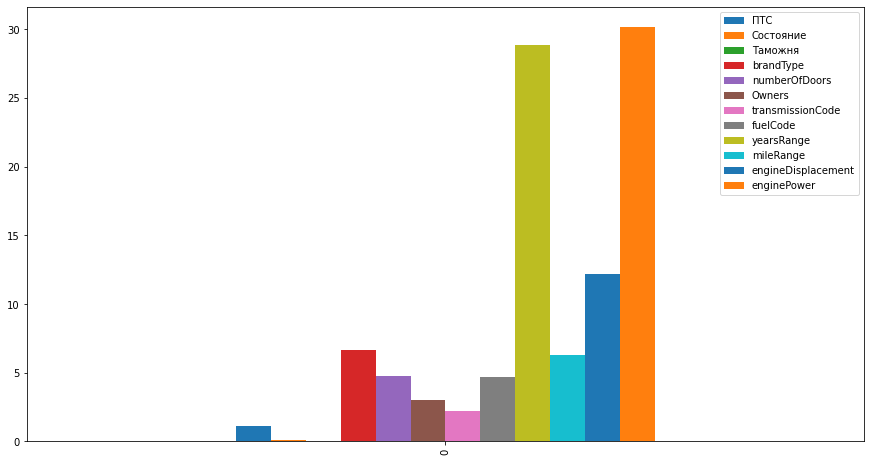

In [268]:
# график
f_importance_cb.plot(kind='bar',  figsize = (15, 8))

1 - enginePower, 2 и 3 - yearsRange и engineDisplacement, 4, 5, 6, 7 - brandType, mileRange, numberOfDoors, transmission_code

#### AdaBoost

In [ ]:
adabost.feature_importances_

In [269]:
f_importance_ab = pd.DataFrame(columns=X.columns)
f_importance_ab.loc[0] = adabost.feature_importances_
f_importance_ab

,ПТС,Состояние,Таможня,brandType,numberOfDoors,Owners,transmissionCode,fuelCode,yearsRange,mileRange,engineDisplacement,enginePower
0,0.002866,0.004983,0.0,0.113889,0.06687,0.052714,0.018963,0.021144,0.235967,0.058984,0.223968,0.199652


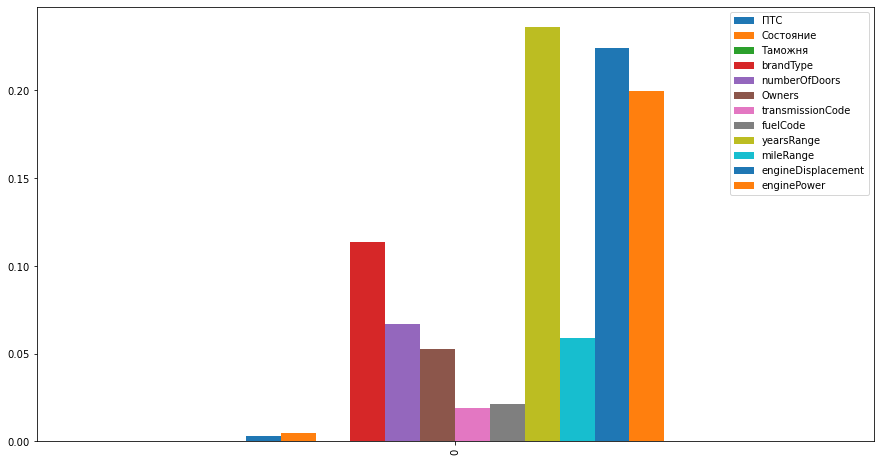

In [270]:
# график
f_importance_ab.plot(kind='bar',  figsize = (15, 8))

1 - yearsRange, 2 и 3 - engineDisplacement и enginePower, 4, 5, 6, 7- brandType, numberOfDoors, mileRange, Owners

#### Grboost

In [271]:
f_importance_gb = pd.DataFrame(columns=X.columns)
f_importance_gb.loc[0] = grbost.feature_importances_
f_importance_gb

,ПТС,Состояние,Таможня,brandType,numberOfDoors,Owners,transmissionCode,fuelCode,yearsRange,mileRange,engineDisplacement,enginePower
0,0.006096,0.001511,0.000002,0.051908,0.019532,0.013966,0.007565,0.018917,0.442922,0.030546,0.062552,0.344484


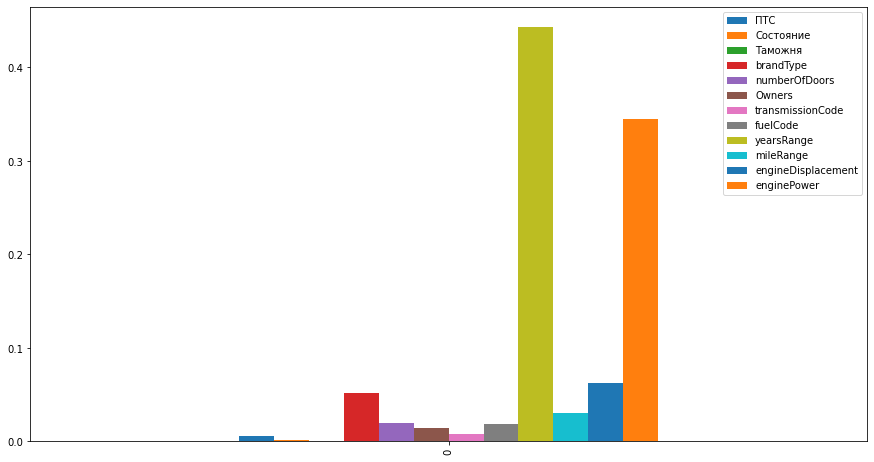

In [272]:
# график
f_importance_gb.plot(kind='bar',  figsize = (15, 8))

1 - yearsRange, 2 и 3 - brandType и enginePower, 4, 5, 6, 7- engineDisplacement, mileRange, Владельцы, numberOfDoors

#### RandomForestRegressor

In [273]:
f_importance_rf = pd.DataFrame(columns=X.columns)
f_importance_rf.loc[0] = rf.feature_importances_
f_importance_rf

,ПТС,Состояние,Таможня,brandType,numberOfDoors,Owners,transmissionCode,fuelCode,yearsRange,mileRange,engineDisplacement,enginePower
0,0.012895,0.001364,0.000027,0.051882,0.038704,0.045518,0.034477,0.030336,0.251727,0.053933,0.139476,0.339662


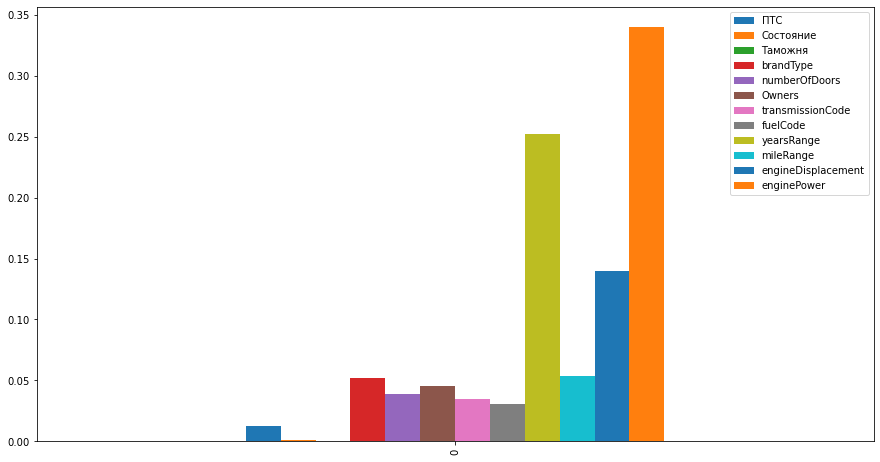

In [274]:
f_importance_rf.plot(kind='bar',  figsize = (15, 8))

1 - yearsRange, 2 и 3 - engineDisplacement и enginePower; 
4, 5, 6, 7- brandType, mileRange, numberOfDoors, Владельцы;
8 и 9 - transmissionCode и fuelCode

#### LGBMRegressor

In [275]:
f_importance_lg = pd.DataFrame(columns=X.columns)
f_importance_lg.loc[0] = lgb.feature_importances_
f_importance_lg

,ПТС,Состояние,Таможня,brandType,numberOfDoors,Owners,transmissionCode,fuelCode,yearsRange,mileRange,engineDisplacement,enginePower
0,48,0,0,79,247,288,150,228,277,223,916,1961


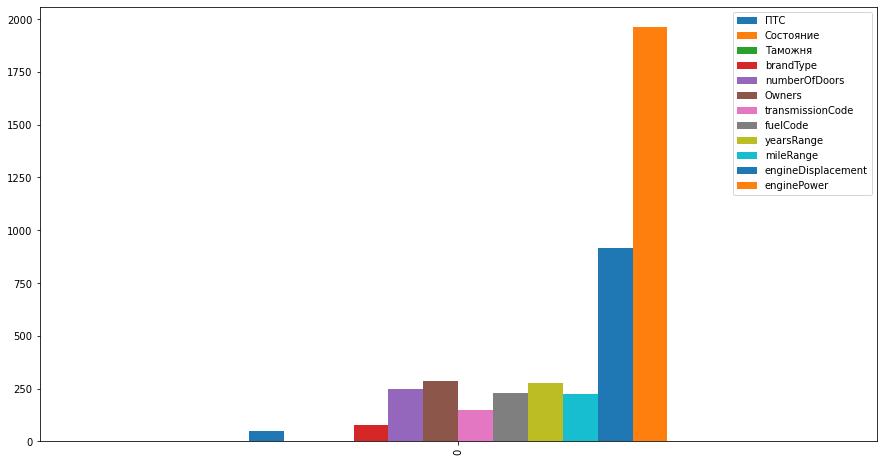

In [276]:
f_importance_lg.plot(kind='bar', figsize = (15, 8))

1 - enginePower,
2,3,4 - engineDisplacement, Owners, yearsRange, numberOfDoors, mileRange. 

Вывод: во всех моделях, кроме LGBM, выделяется одинаковая последовательность признаков по значимости. Будем основывать свои выводы на её основе

Самые значимые признаки во всех моделях: enginePower, engineDisplacement, Owners, yearsRange, numberOfDoors

### Устранение корреляции

Ещё раз взглянем на корреляции

In [ ]:
sns.heatmap(X.corr())

У enginePower и engineDisplacement явная корреляция, попробуем сравнить точность модели с обоими признаками и с каждым по отдельности

Сначала оставим всё как есть и проверим метрику с двумя признаками

In [590]:
bin_cols = ['ПТС', 'Состояние', 'Руль', 'brandType']
cat_cols = ['numberOfDoors', 'Owners', 'transmissionCode', 'fuelCode', 'yearsRange', 'mileRange']
dig_cols = ['engineDisplacement', 'enginePower']
X = train_data[bin_cols+cat_cols+dig_cols]
y = train_data.price

In [591]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
clf = LinearRegression()
clf.fit(X_train, np.log(y_train))
y_pred = np.exp(clf.predict(X_test))

In [592]:
d = {'y_test': y_test, 'y_pred': y_pred}

pd.DataFrame(data=d)

,y_test,y_pred
35612,879000,1.358267e+06
54877,2450000,3.218279e+06
49037,900000,9.237079e+05
37615,1648000,1.299161e+06
59937,400000,3.916716e+05
...,...,...
60962,215000,2.376009e+05
63790,1555000,1.772487e+06
40507,650000,9.824922e+05
42979,1350000,9.338957e+05


In [593]:
print(f"Точность модели по метрике MAPE: {(mape(y_test, y_pred))*100:0.2f}%")

Точность модели по метрике MAPE: 32.16%


Теперь с каждым по отдельности

In [594]:
# удаляем engineDisplacement
X_train, X_test, y_train, y_test = train_test_split(X.drop('engineDisplacement', axis=1), y, test_size=0.2, random_state=42, shuffle=True)
clf = LinearRegression()
clf.fit(X_train, np.log(y_train))
y_pred = np.exp(clf.predict(X_test))

print(f"Точность модели по метрике MAPE: {(mape(y_test, y_pred))*100:0.2f}%")

Точность модели по метрике MAPE: 32.14%


In [595]:
# удаляем enginePower
X_train, X_test, y_train, y_test = train_test_split(X.drop('enginePower', axis=1), y, test_size=0.2, random_state=42, shuffle=True)
clf = LinearRegression()
clf.fit(X_train, np.log(y_train))
y_pred = np.exp(clf.predict(X_test))

print(f"Точность модели по метрике MAPE: {(mape(y_test, y_pred))*100:0.2f}%")

Точность модели по метрике MAPE: 38.39%


Точность простой линейной регрессии лучше, если удалить признак engineDisplacement

Попробуем 3 раза обучить catBoost: с 2-мя признаками и c каждым по отдельности

In [579]:
# 0.01
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

model = CatBoostRegressor(iterations = 5000,
                          learning_rate = 0.01,
                          random_seed = 42,
                          eval_metric='MAPE',
                         # custom_metric=['R2', 'MAE'],
                          silent=True,
#                           od_wait = 100,
#                           od_type = 'Iter'                  
                         )
# модель со всеми признаками
model.fit(X_train, np.log(y_train),
         #cat_features=cat_features_ids,
        eval_set=(X_test, np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         #plot=True
         )
predict_all = np.exp(model.predict(X_test))

# модель только с признаком engineDisplacement
model.fit(X_train.drop('enginePower', axis=1), np.log(y_train),
         #cat_features=cat_features_ids,
         eval_set=(X_test.drop('enginePower', axis=1), np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         #plot=True
         )
predict_dis = np.exp(model.predict(X_test.drop('enginePower', axis=1)))

# модель только с признаком enginePower
model.fit(X_train.drop('engineDisplacement', axis=1), np.log(y_train),
         #cat_features=cat_features_ids,
         eval_set=(X_test.drop('engineDisplacement', axis=1), np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         #plot=True
         )
predict_pow = np.exp(model.predict(X_test.drop('engineDisplacement', axis=1)))


In [580]:
print(f"Точность модели со всеми признаками по метрике MAPE: {(mape(y_test, predict_all))*100:0.2f}% \n"
      f"Точность модели только с признаком engineDisplacement по метрике MAPE:{(mape(y_test, predict_dis))*100:0.2f}% \n"
      f"Точность модели только с признаком enginePower по метрике MAPE:{(mape(y_test, predict_pow))*100:0.2f}%")

Точность модели со всеми признаками по метрике MAPE: 22.22% 
Точность модели только с признаком engineDisplacement по метрике MAPE:28.54% 
Точность модели только с признаком enginePower по метрике MAPE:24.36%


Метрика: со всеми признаками - 22.22%, без engineDisplacement - 28.54%(и переобучается), без enginePower - 24.36%
Вывод: точность catBoost лучше со всеми признаками и при этом переобучение меньше.

**Добавление категориальных признаков**

Заменим признаки engineDisplacement и enginePower на категориальные engineDisplacementCode и enginePowerCode.

In [584]:
cars.columns

Index(['bodyType', 'brand', 'car_url', 'color', 'description',
       'engineDisplacement', 'enginePower', 'fuelType', 'image', 'mileage',
       'modelDate', 'model_name', 'name', 'numberOfDoors', 'productionDate',
       'vehicleConfiguration', 'vehicleTransmission', 'Владельцы', 'ПТС',
       'Привод', 'Руль', 'Состояние', 'Таможня', 'sample', 'price', 'years',
       'yearsRange', 'mileRange', 'brandType', 'transmissionCode', 'fuelCode',
       'Owners', 'engineDisplacementCode', 'enginePowerCode', 'oldBrand'],
      dtype='object')

In [611]:
train_data = cars.query('sample == 1').drop(['sample'], axis=1)

In [612]:
bin_cols = ['ПТС', 'Состояние', 'brandType']
cat_cols = ['numberOfDoors', 'Owners', 'transmissionCode', 'fuelCode', 'yearsRange', 'mileRange']
dig_cols = ['engineDisplacementCode', 'enginePowerCode']
X = train_data[bin_cols+cat_cols+dig_cols]
y = train_data.price

In [613]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
clf = LinearRegression()
clf.fit(X_train, np.log(y_train))
y_pred = np.exp(clf.predict(X_test))

print(f"Точность модели по метрике MAPE: {(mape(y_test, y_pred))*100:0.2f}%")

Точность модели по метрике MAPE: 35.18%


В модели catBoost с такими же параметрами и теми же признаками-некатегориальными значение мертики точно такое же.

In [614]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
model = CatBoostRegressor(iterations = 5000,
                          learning_rate = 0.01,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
#                           od_wait = 100,
#                           od_type = 'Iter'                  
                         )
model.fit(X_train, np.log(y_train),
         #cat_features=cat_features_ids,
         eval_set=(X_test, np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         plot=True
         )

predict = np.exp(model.predict(X_test))
print(f"Точность модели со всеми признаками по метрике MAPE: {(mape(y_test, predict))*100:0.2f}%")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Точность модели со всеми признаками по метрике MAPE: 28.13%


Посмотрим, как изменилось влияние признаков на модель после перевода в категориальные в модели catboost

In [588]:
f_importance_cb = pd.DataFrame(columns=X.columns)
f_importance_cb.loc[0] = model.feature_importances_
f_importance_cb

,ПТС,Состояние,Таможня,brandType,numberOfDoors,Owners,transmissionCode,fuelCode,yearsRange,mileRange,engineDisplacementCode,enginePowerCode
0,0.77192,0.006587,0.0,4.286969,1.301475,3.71964,6.512196,8.191998,29.932811,11.963686,8.698788,24.613931


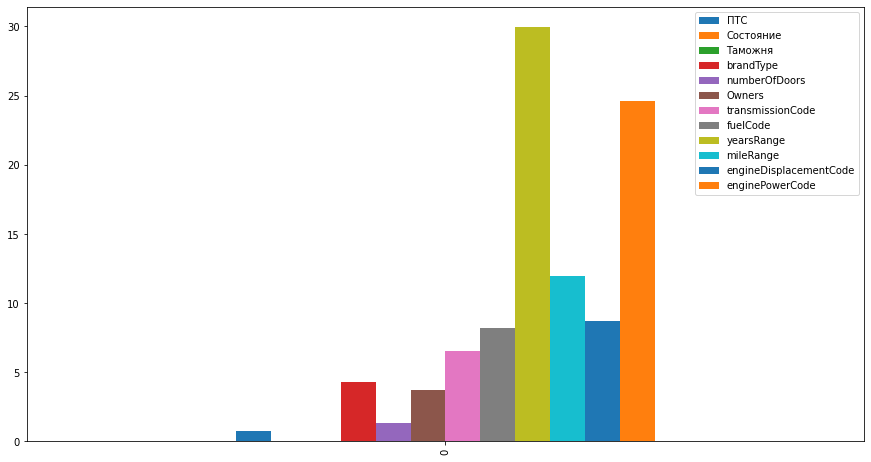

In [589]:
# график
f_importance_cb.plot(kind='bar',  figsize = (15, 8))

Cудя по графику значение для модели признаков, переведённых в категориальные, стало даже меньшим.

Метрика стала хуже.

<a id='4.6'> <a>
# Модель на данных без выбросов

In [247]:
train_v1_data = carsv1.query('sample == 1').drop(['sample'], axis=1)
test_v1_data = carsv1.query('sample == 0').drop(['sample', 'price'], axis=1)

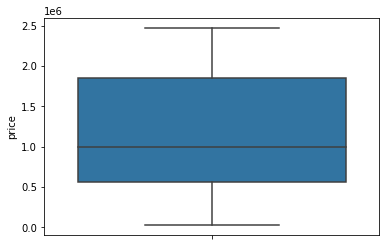

In [248]:
sns.boxplot(y='price', data=train_v1_data)

In [249]:
bin_cols = ['ПТС', 'Состояние', 'brandType', 'Руль']
cat_cols = ['numberOfDoors', 'Owners', 'transmissionCode', 'fuelCode', 'yearsRange', 'mileRange']
dig_cols = ['engineDisplacement', 'enginePower']
X = train_v1_data[bin_cols+cat_cols+dig_cols]
y = train_v1_data.price

In [250]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33531 entries, 34686 to 68216
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ПТС                 33531 non-null  int64  
 1   Состояние           33531 non-null  int64  
 2   brandType           33531 non-null  int64  
 3   Руль                33531 non-null  int64  
 4   numberOfDoors       33531 non-null  int64  
 5   Owners              33531 non-null  int64  
 6   transmissionCode    33531 non-null  int64  
 7   fuelCode            33531 non-null  int64  
 8   yearsRange          33531 non-null  int64  
 9   mileRange           33531 non-null  int64  
 10  engineDisplacement  33531 non-null  float64
 11  enginePower         33531 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 3.3 MB


In [251]:
y

34686    2475000.0
34687     638000.0
34688    2475000.0
34689    2475000.0
34690    2475000.0
           ...    
68212     210000.0
68213     330000.0
68214     430000.0
68215     135000.0
68216     210000.0
Name: price, Length: 33531, dtype: float64

Линейная регрессия:

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
clf = LinearRegression()
clf.fit(X_train, np.log(y_train))
y_pred = np.exp(clf.predict(X_test))

print(f"Точность модели по метрике MAPE: {(mape(y_test, y_pred))*100:0.2f}%")

Точность модели по метрике MAPE: 33.20%


CatBoost:

In [253]:
model = CatBoostRegressor(iterations = 5000,
                          learning_rate = 0.1,
                          random_seed = 42,
                          eval_metric='MAPE',
                         # custom_metric=['R2', 'MAE'],
                          silent=True,
#                           od_wait = 100,
#                           od_type = 'Iter'                  
                         )
model.fit(X_train, np.log(y_train),
         #cat_features=cat_features_ids,
         eval_set=(X_test, np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         plot=True
         )

predict = np.exp(model.predict(X_test))
print(f"Точность модели со всеми признаками по метрике MAPE: {(mape(y_test, predict))*100:0.2f}%")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Точность модели со всеми признаками по метрике MAPE: 17.18%


Вывод: от замены выбросов метрика улучшилась при тестировании на обеих моделях.

<a id='4.7'> <a>
## Итоговая модель

Используем модель CatBoost с установленными выше параметрами (при которой значение метрики 17.18%)

Подготовим тестовый набор данных

In [255]:
bin_cols = ['ПТС', 'Состояние', 'brandType', 'Руль']
cat_cols = ['numberOfDoors', 'Owners', 'transmissionCode', 'fuelCode', 'yearsRange', 'mileRange']
dig_cols = ['engineDisplacement', 'enginePower']
X_Test = test_v1_data[bin_cols+cat_cols+dig_cols]

In [256]:
# проверим содержание тестового датасета
X_Test.head()

,ПТС,Состояние,brandType,Руль,numberOfDoors,Owners,transmissionCode,fuelCode,yearsRange,mileRange,engineDisplacement,enginePower
0,1,1,0,1,2,0,1,0,2,2,0.788457,4.663439
1,1,1,0,1,2,2,0,0,2,2,0.955511,4.709530
2,1,1,0,1,2,2,1,0,2,2,1.029619,5.030438
3,1,1,0,1,2,2,2,0,2,2,0.955511,4.709530
4,1,1,0,1,2,2,2,0,1,3,1.029619,5.030438


Используем модель CatBoost, обученную на очищенных от выбросов данных.

Можно также обучить модель на всех тренировочных данных, тк тренировочная выборка близка по размеру к тестовой.

Параметры модели уже заданы выше, необходимо только обучить её:

In [259]:
model.fit(X, np.log(y),
         #cat_features=cat_features_ids,
         eval_set=(X, np.log(y)),
         verbose_eval=0,
         use_best_model=True,
         plot=True
         )


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Можно проверить точность по части датасета, понятно, что модель уже знакома с данными, но точность самая высокая.

In [260]:
predict = np.exp(model.predict(X.iloc[3400:27600]))
print(f"Точность модели со всеми признаками по метрике MAPE: {(mape(y[3400:27600], predict))*100:0.2f}%")

Точность модели со всеми признаками по метрике MAPE: 17.79%


<a id='5'> <a>
# Submission

Заполним sample_submission предсказаниями созданной модели.

In [261]:
predict = np.exp(model.predict(X_Test))

In [262]:
sample_submission.price = predict

In [263]:
sample_submission

,sell_id,price
0,1100575026,7.302864e+05
1,1100549428,7.744909e+05
2,1100658222,1.207641e+06
3,1100937408,8.287909e+05
4,1101037972,9.370980e+05
...,...,...
34681,1101369263,1.163682e+06
34682,1101369581,2.205213e+06
34683,1101364889,3.218421e+05
34684,1101362518,1.553622e+06


In [264]:
sample_submission.to_csv('submission.csv', index=False)

<a id="6"></a>
# Замечания к работе

Лучшее значение метрики: 17.18% с моделью CatBoost на данных без выбросов.

Пробовал сделать, но не дало результата или было с переменным успехом:
* перемножение признаков - метрика ухудшилась;
* стакинг сначала работал, затем стал выдавать ошибку, что max_features must be in (0, n_features], при том, что во всех моделях, где присутствует данный параметр, он установлен 5 или 8 специально, чтобы не было ошибки (однажды, поменяв max_features с 11 на 5 в grbost ошибка перестала выскакивать)
 